## Imports:

In [1]:
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt_lab
import matplotlib.gridspec as gridspec
import obspy
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load data:
We are going to use this data to plot spectograms of SCG signals. 

In [3]:
path = "/Users/ecem/Desktop/phonocardiogram/data/AV/"

In [4]:
csv = pd.read_csv("/Users/ecem/Desktop/phonocardiogram/data/fixed_csv.csv")

In [5]:
csv.head()

Unnamed: 0  Patient ID    Age     Sex  Height  Weight  Pregnancy status  \
0           0        2530  Child  Female    98.0    15.9             False   
1           1        9979  Child  Female   103.0    13.1             False   
2           2        9983  Child    Male   115.0    19.1             False   
3           3       13918  Child    Male    98.0    15.9             False   
4           4       14241  Child    Male    87.0    11.2             False   

    Murmur Most audible location Systolic murmur timing  ... Campaign  \
0   Absent                   NaN                    NaN  ...   CC2015   
1  Present                    TV           Holosystolic  ...   CC2015   
2  Unknown                   NaN                    NaN  ...   CC2015   
3  Present                    TV           Holosystolic  ...   CC2015   
4  Present                    PV         Early-systolic  ...   CC2015   

  Additional ID recording location AV recording location MV  \
0           NaN                   1.0                   1.0   
1           NaN                   1.0                   1.0   
2           NaN                   1.0                   1.0   
3           NaN                   1.0                   1.0   
4           NaN                   1.0                   1.0   

  recording location PV recording location TV murmur location AV  \
0                   1.0                   1.0                0.0   
1                   1.0                   1.0                1.0   
2                   1.0                   1.0                0.0   
3                   1.0                   1.0                0.0   
4                   1.0                   1.0                1.0   

  murmur location MV murmur location PV murmur location TV  
0                0.0                0.0                0.0  
1                1.0                1.0                1.0  
2                0.0                0.0                0.0  
3                0.0                0.0                1.0  
4                1.0                1.0                1.0  

[5 rows x 30 columns]

### get indexes for recordings taken in specific location with murmur =  present in each location

In [6]:
#this shows indexes of recordings taken in av location which also has a murmur at av
idx =  np.where((csv['Murmur'] == 'Present') & (csv['murmur location AV'] == 1) &
                           (csv['murmur location MV'] == 1) &
                           (csv['murmur location PV'] == 1) &
                           (csv['murmur location TV'] == 1) &
                           (csv['recording location AV'] == 1) &
                          (csv['recording location MV'] == 1) &
                          (csv['recording location PV'] == 1) &
                          (csv['recording location TV'] == 1))
idx

(array([  1,   4,   8,  19,  21,  23,  33,  42,  43,  55,  57,  64,  68,
         82, 106, 136, 176, 203, 216, 219, 220, 233, 242, 272, 332, 416,
        429, 434, 440, 441, 446, 453, 463, 466, 469, 471, 479, 485, 488,
        498, 527, 528, 529, 539, 551, 555, 572, 573, 588, 609, 650, 659,
        665, 666, 667, 711, 743, 752, 758, 762, 773, 782, 783, 787, 800,
        816, 844, 856, 860, 892]),)

In [7]:
ids = csv.loc[idx]['Patient ID'].values
ids

array([ 9979, 14241, 29045, 40840, 44514, 46065, 49574, 49627, 49628,
       49691, 49712, 49754, 49821, 49897, 49994, 50056, 50129, 50209,
       50229, 50233, 50238, 50260, 50277, 50331, 50676, 55945, 68194,
       68255, 68303, 68306, 68337, 68379, 68425, 68432, 68444, 68456,
       68487, 68560, 68582, 68708, 69068, 69079, 69093, 69147, 73497,
       76240, 84692, 84693, 84718, 84751, 84834, 84854, 84863, 84864,
       84865, 84949, 85002, 85024, 85031, 85036, 85057, 85079, 85080,
       85087, 85110, 85133, 85172, 85198, 85207, 85261])

In [8]:
dir_path = "/Users/ecem/Desktop/phonocardiogram/data/training_data"

In [9]:
import librosa

### Lets check waves in time domain for one sample

In [10]:
waves_0 = []
for file in os.listdir(dir_path):
    if (file.endswith(".wav")) and (int(file.split("_")[0]) ==  68337) :
        print(file)
        waves_0.append(librosa.load(os.path.join(dir_path, file))[0]) 


68337_PV.wav


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


68337_MV.wav
68337_AV.wav
68337_TV.wav


In [11]:
len(waves_0)

4

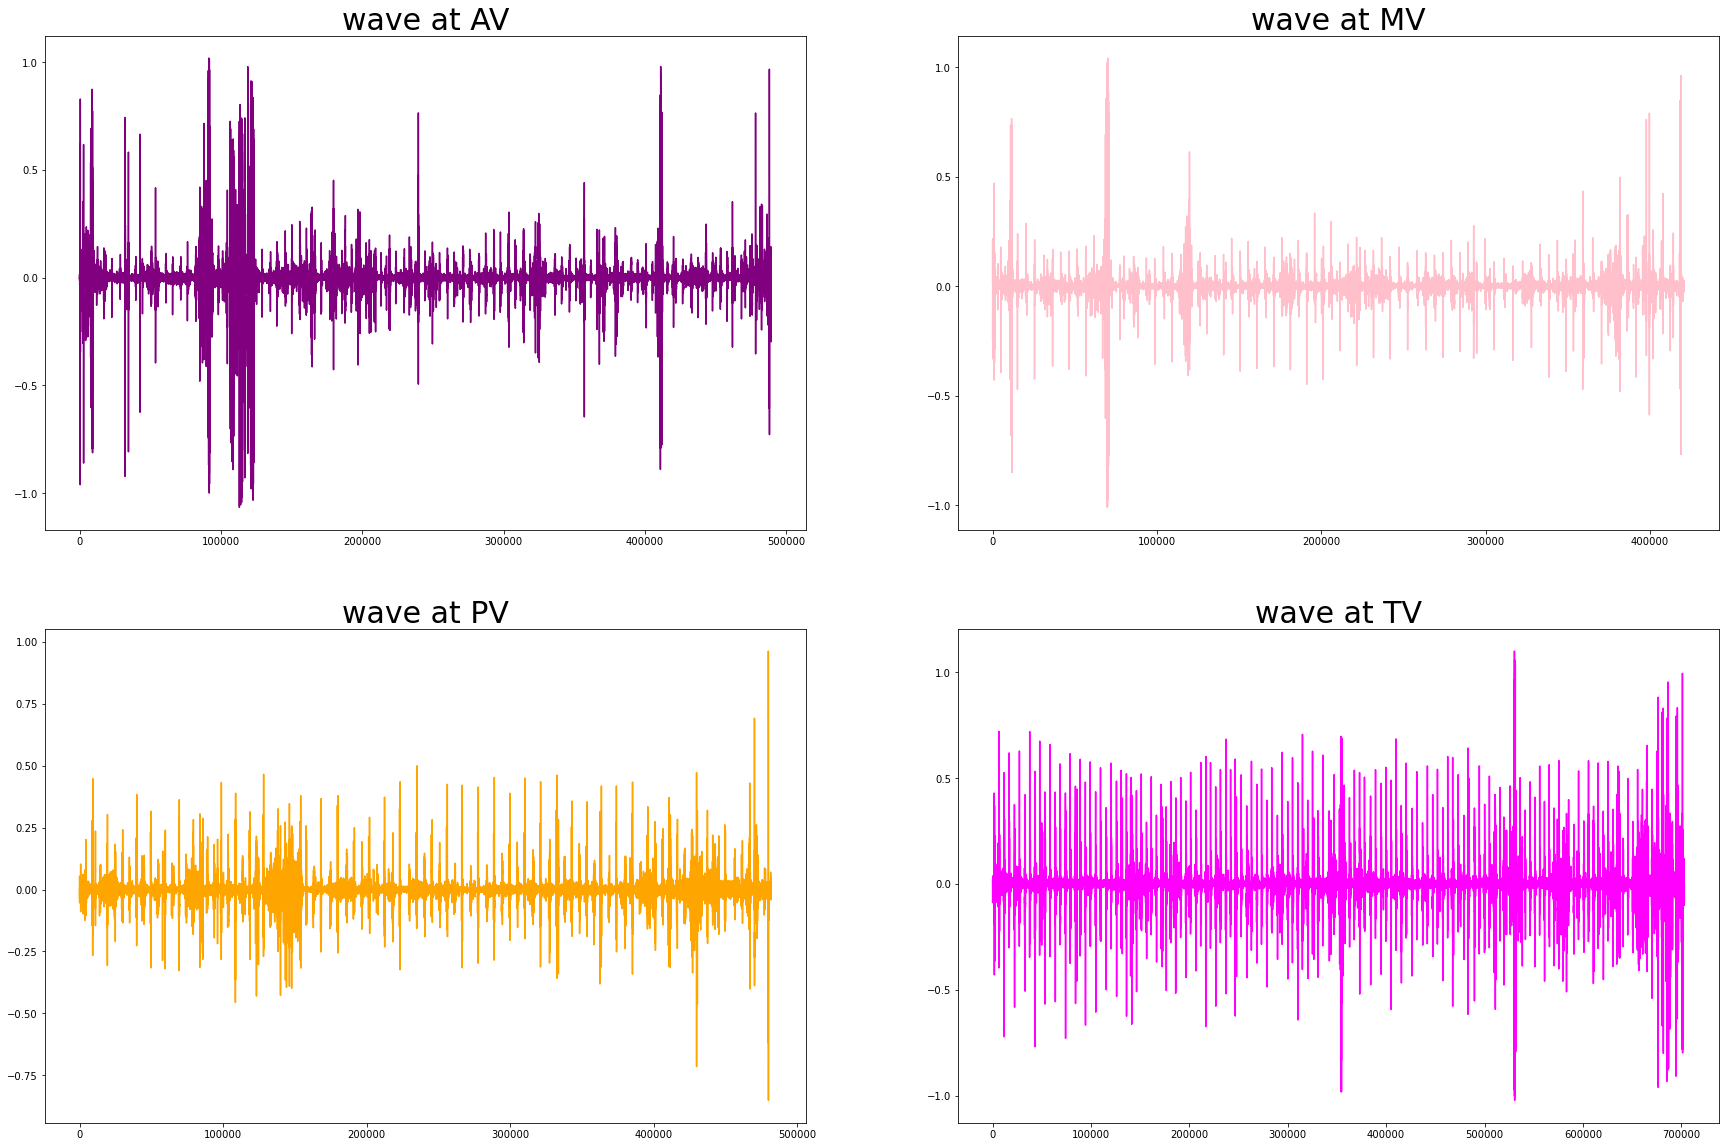

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))

ax1.plot(waves_0[2], color = 'purple')
ax1.set_title("wave at AV", fontsize = 30)

ax2.plot(waves_0[1], color = 'pink')
ax2.set_title("wave at MV", fontsize = 30)

ax3.plot(waves_0[0], color = 'orange')
ax3.set_title("wave at PV", fontsize = 30)

ax4.plot(waves_0[3], color = 'magenta')
ax4.set_title("wave at TV", fontsize = 30)



plt.show()



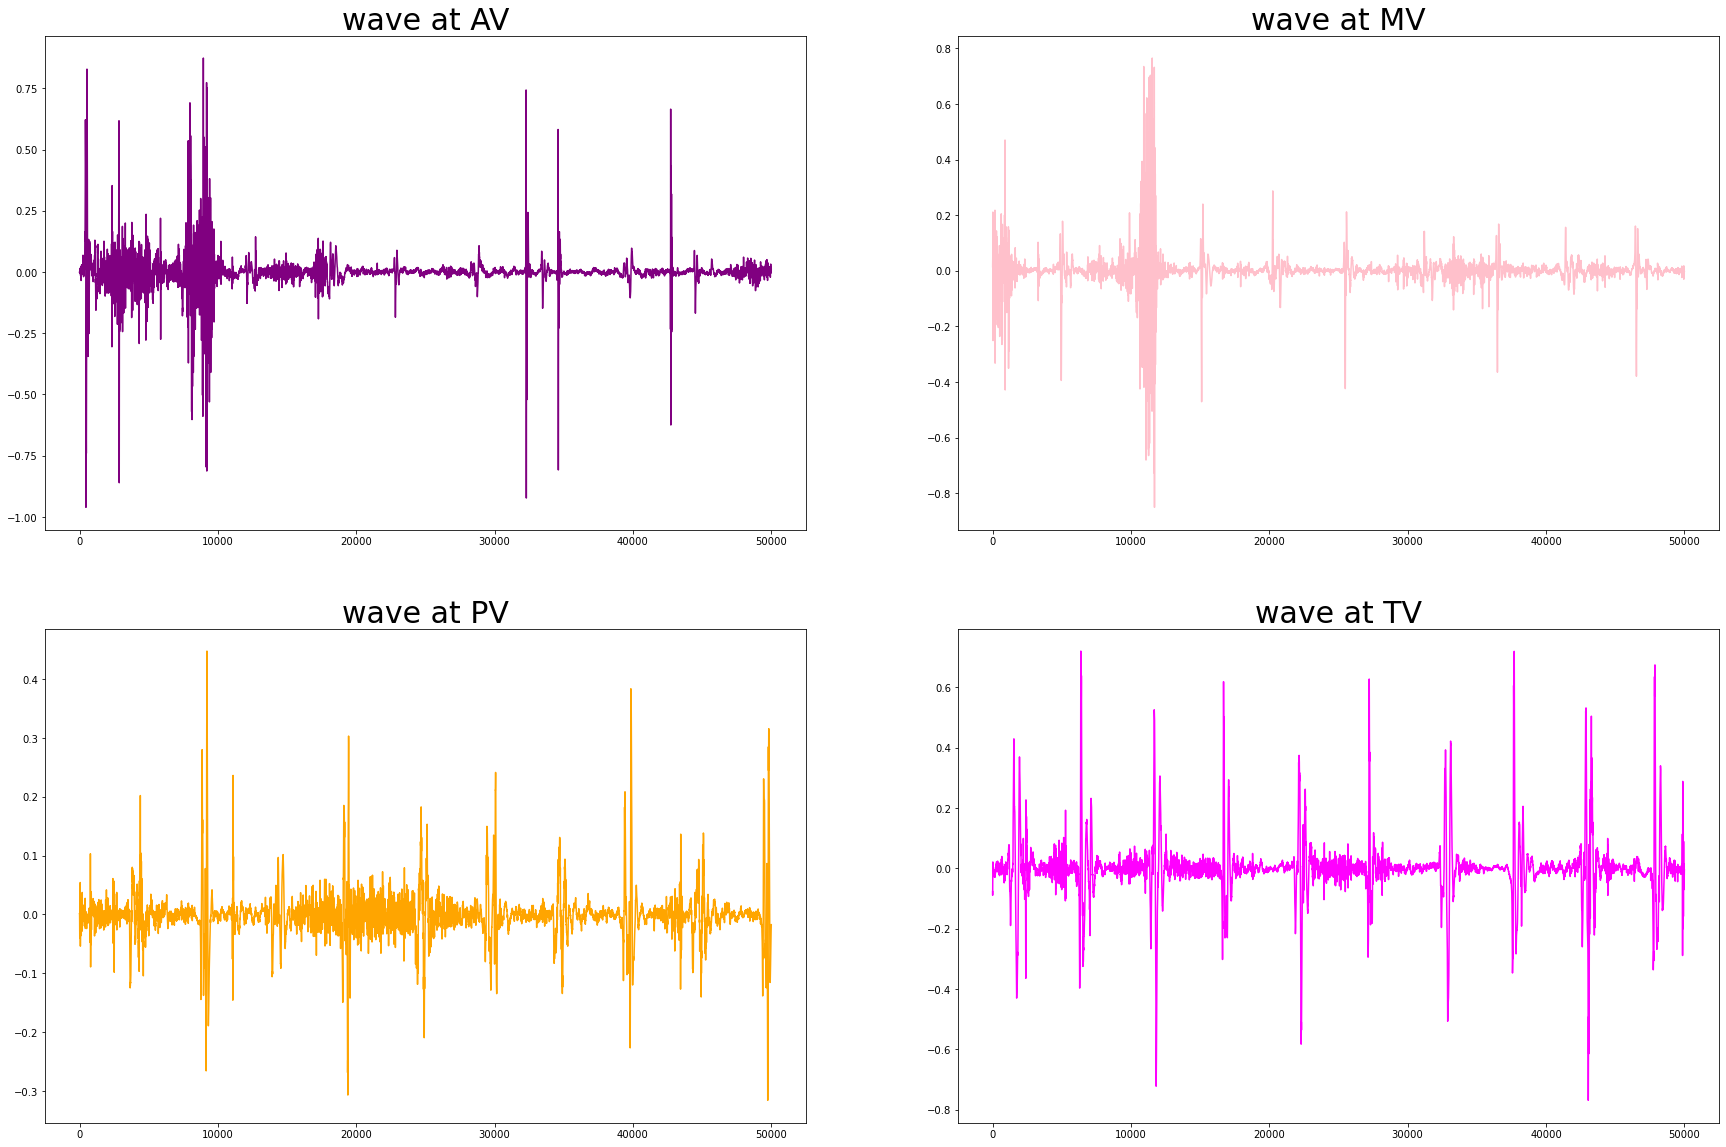

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))

ax1.plot(waves_0[2][:50000], color = 'purple')
ax1.set_title("wave at AV", fontsize = 30)

ax2.plot(waves_0[1][:50000], color = 'pink')
ax2.set_title("wave at MV", fontsize = 30)

ax3.plot(waves_0[0][:50000], color = 'orange')
ax3.set_title("wave at PV", fontsize = 30)

ax4.plot(waves_0[3][:50000], color = 'magenta')
ax4.set_title("wave at TV", fontsize = 30)



plt.show()

### Lets check for another 

In [14]:
waves_9 = []
for file in os.listdir(dir_path):
    if (file.endswith(".wav")) and (int(file.split("_")[0]) == 9979) :
        print(file)
        waves_9.append(librosa.load(os.path.join(dir_path, file))[0]) 

9979_PV.wav
9979_MV.wav
9979_AV.wav
9979_TV.wav


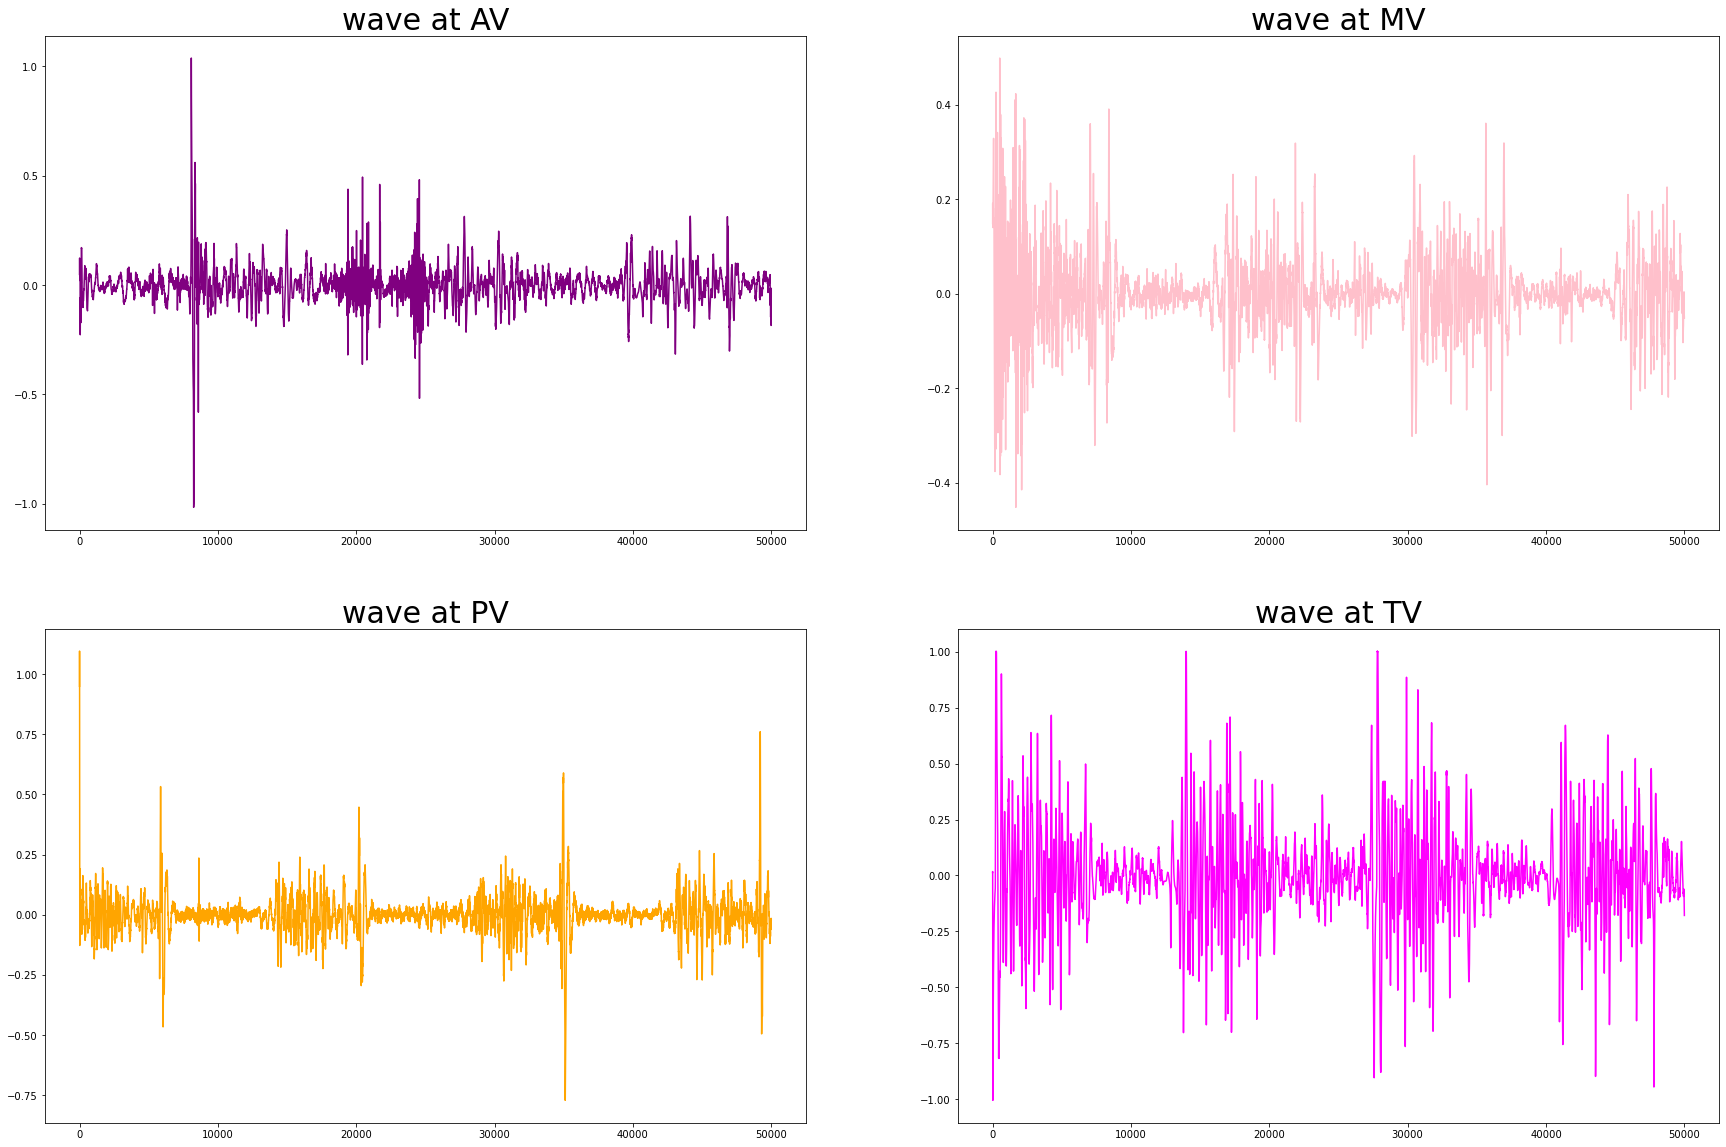

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))

ax1.plot(waves_9[2][:50000], color = 'purple')
ax1.set_title("wave at AV", fontsize = 30)

ax2.plot(waves_9[1][:50000], color = 'pink')
ax2.set_title("wave at MV", fontsize = 30)

ax3.plot(waves_9[0][:50000], color = 'orange')
ax3.set_title("wave at PV", fontsize = 30)

ax4.plot(waves_9[3][:50000], color = 'magenta')
ax4.set_title("wave at TV", fontsize = 30)



plt.show()

### Lets plot them for all

In [16]:
pmat = [50260, 50331, 55945, 68425, 76240, 85031]

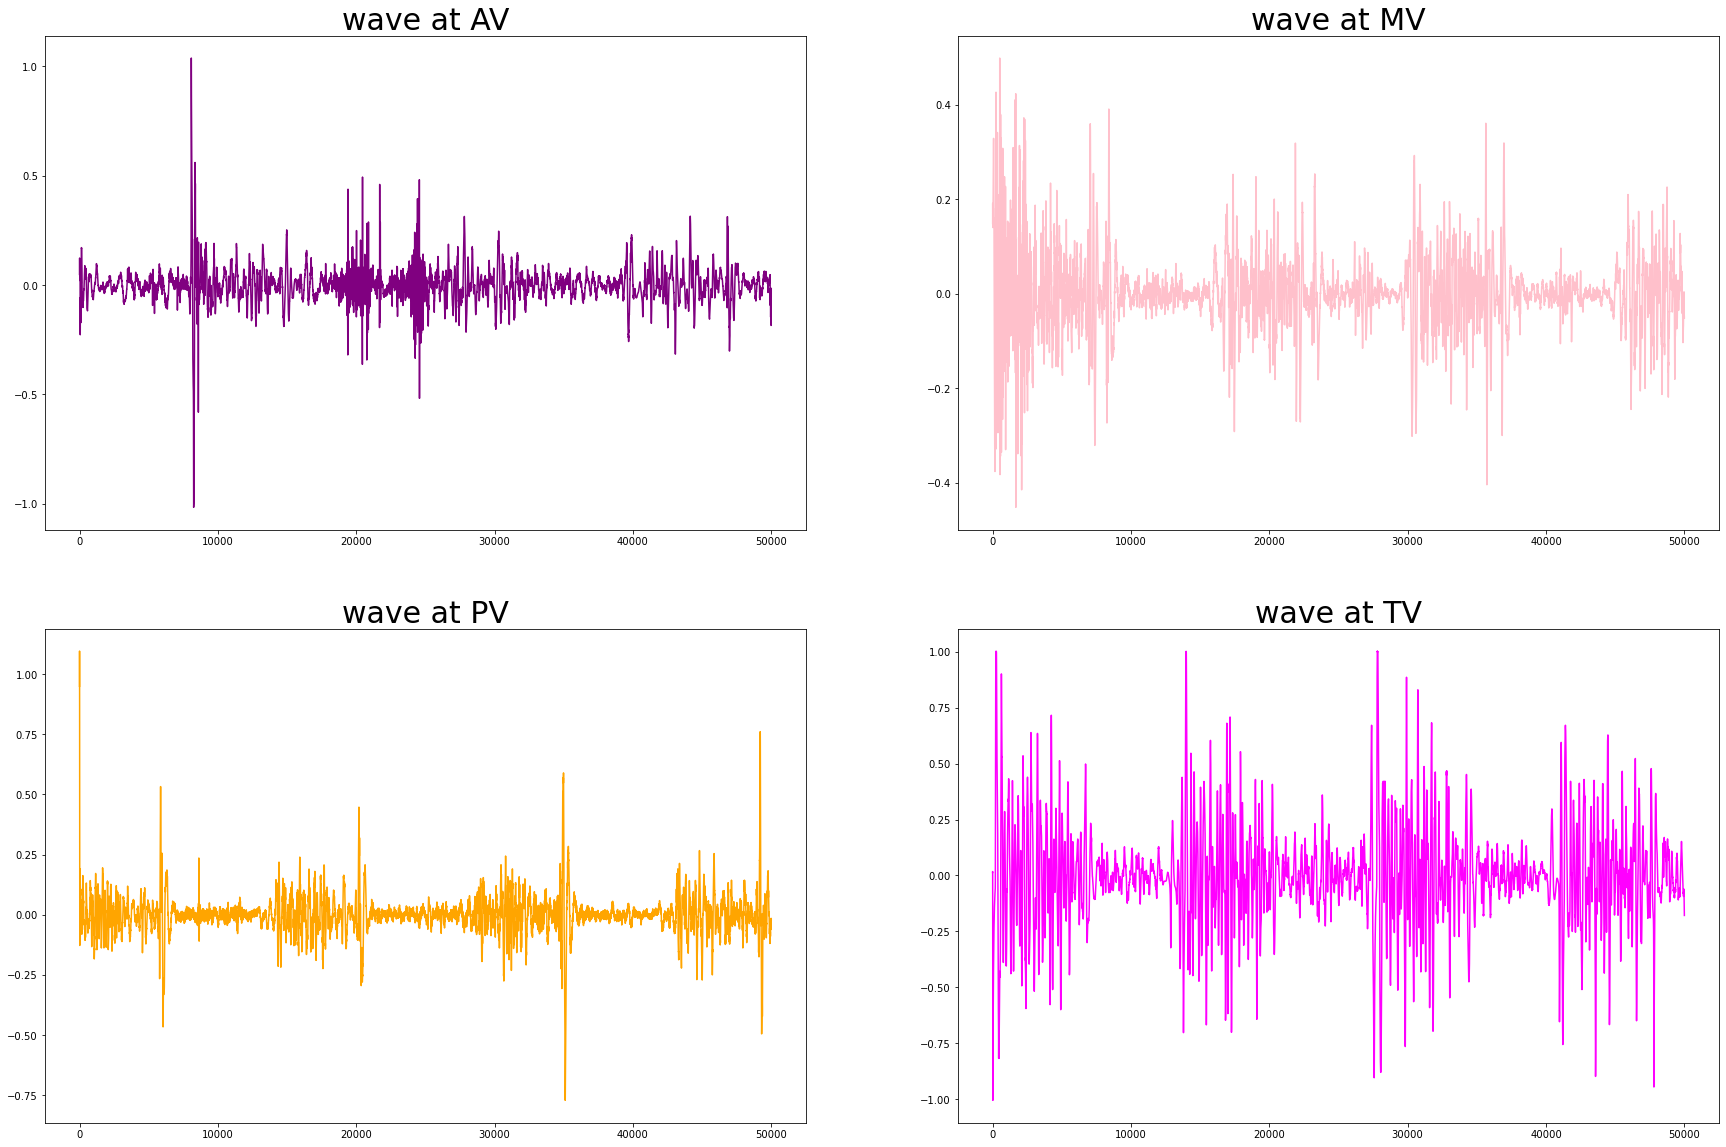

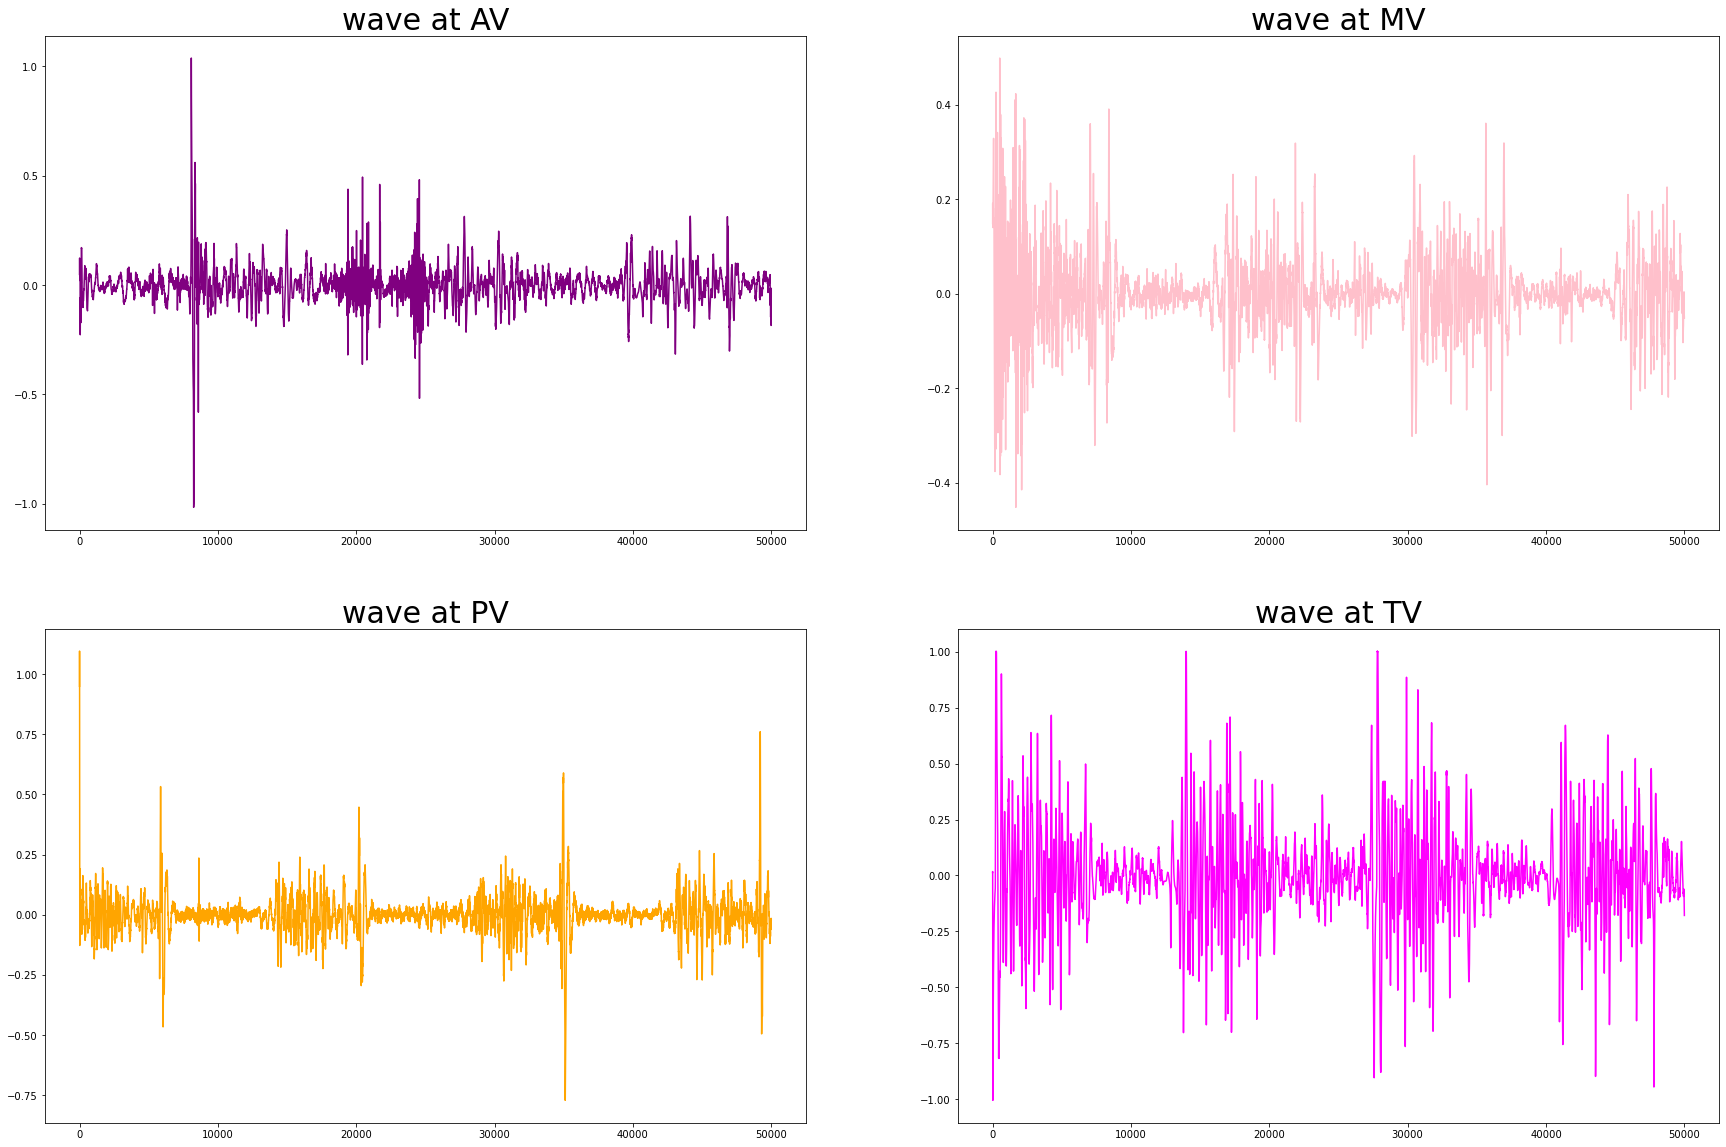

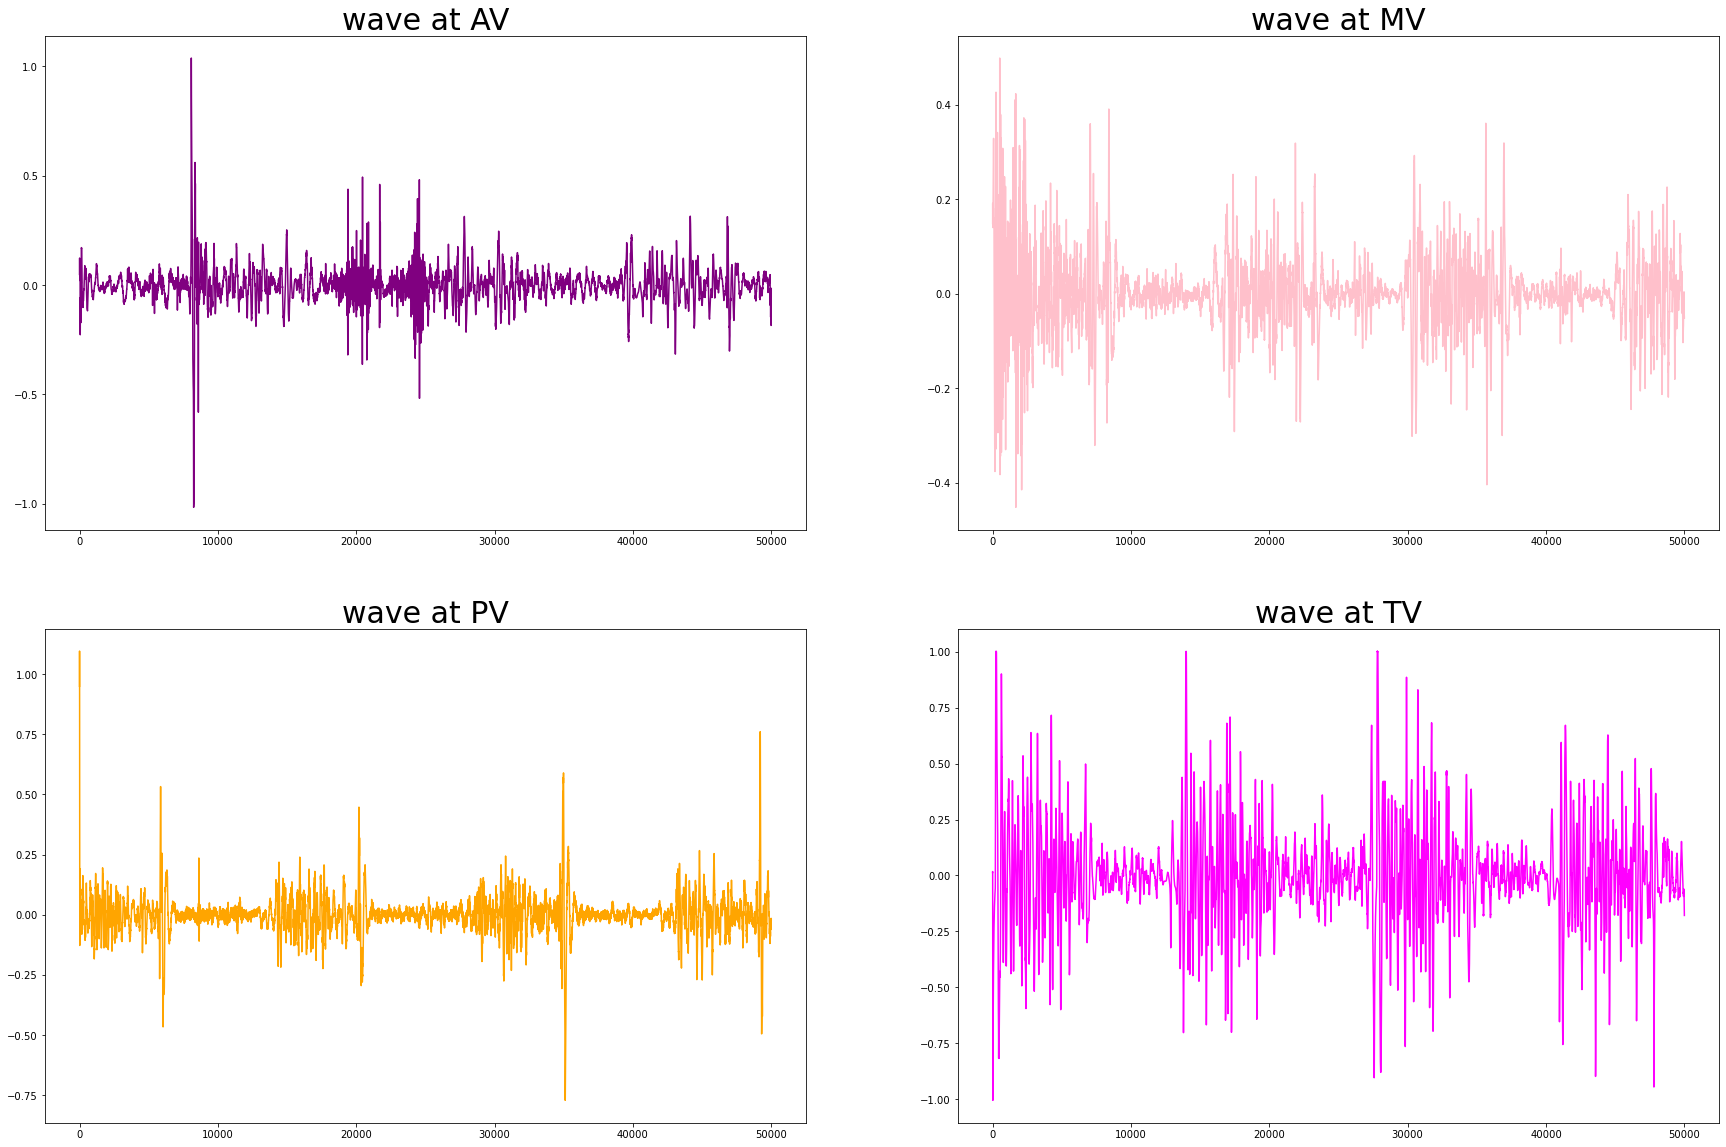

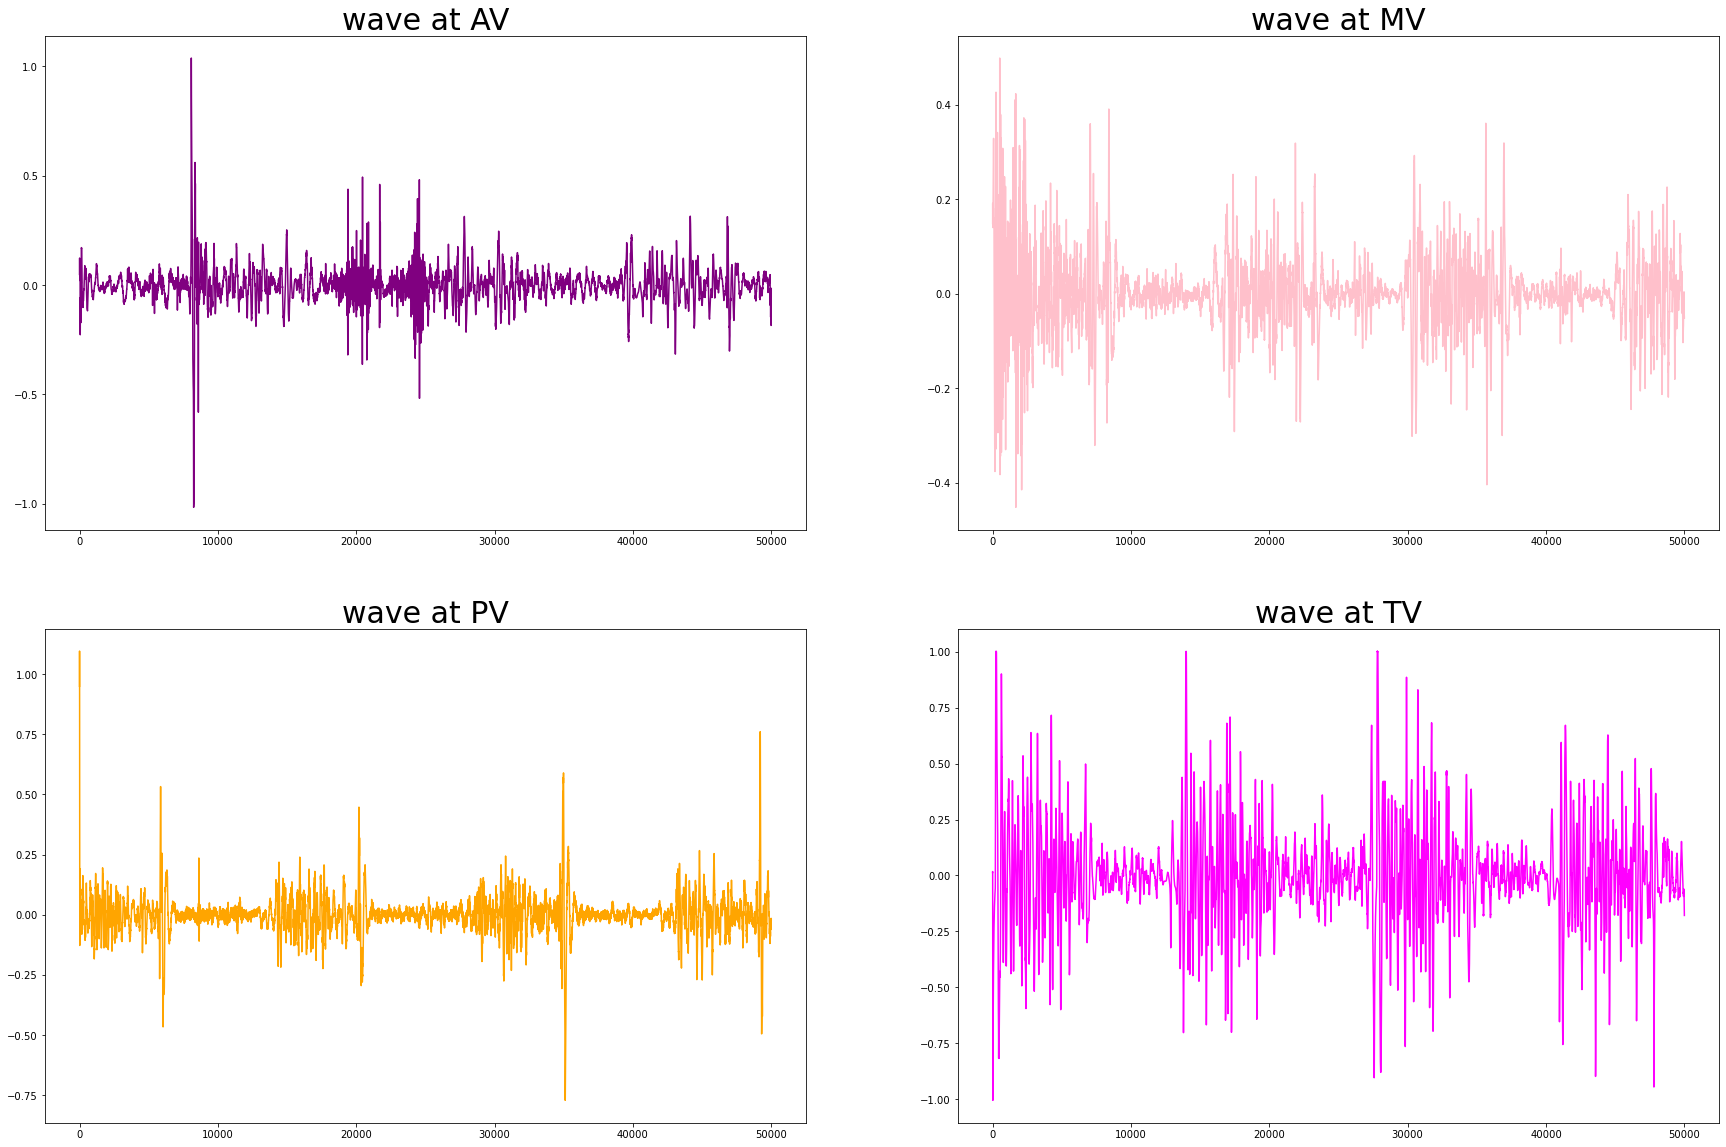

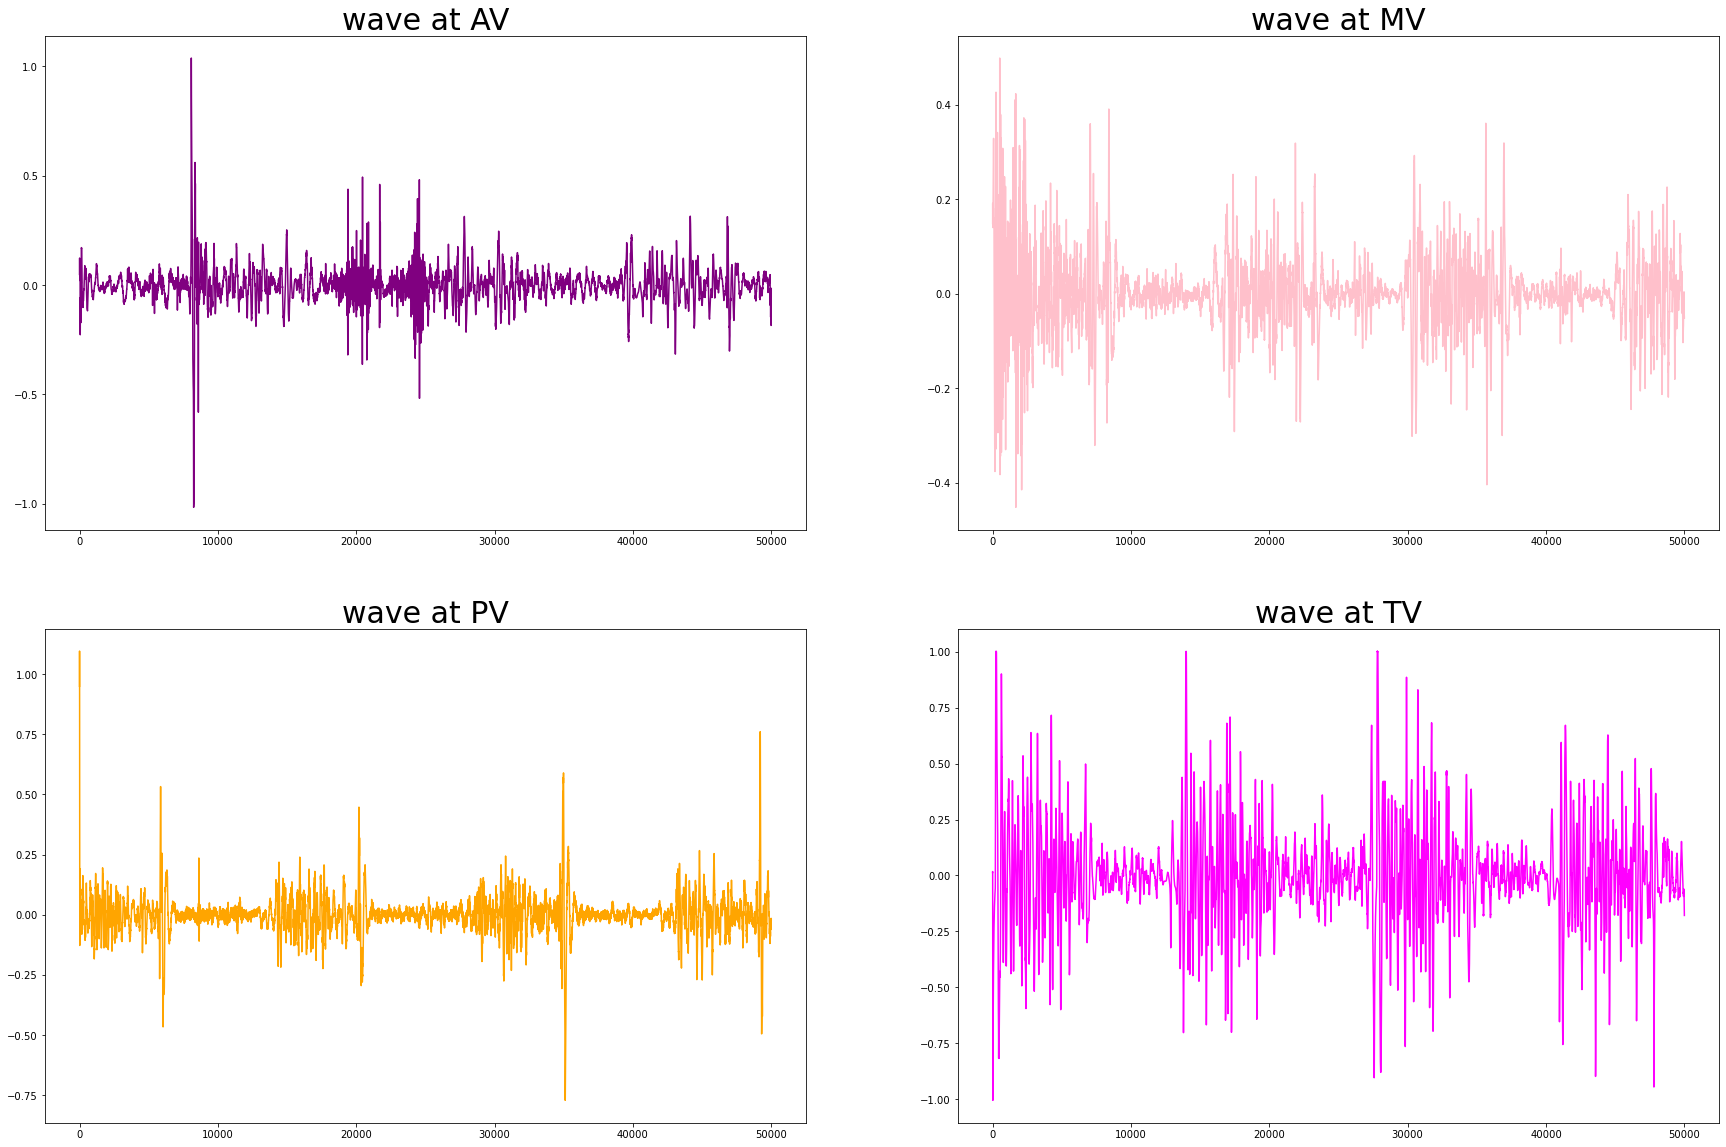

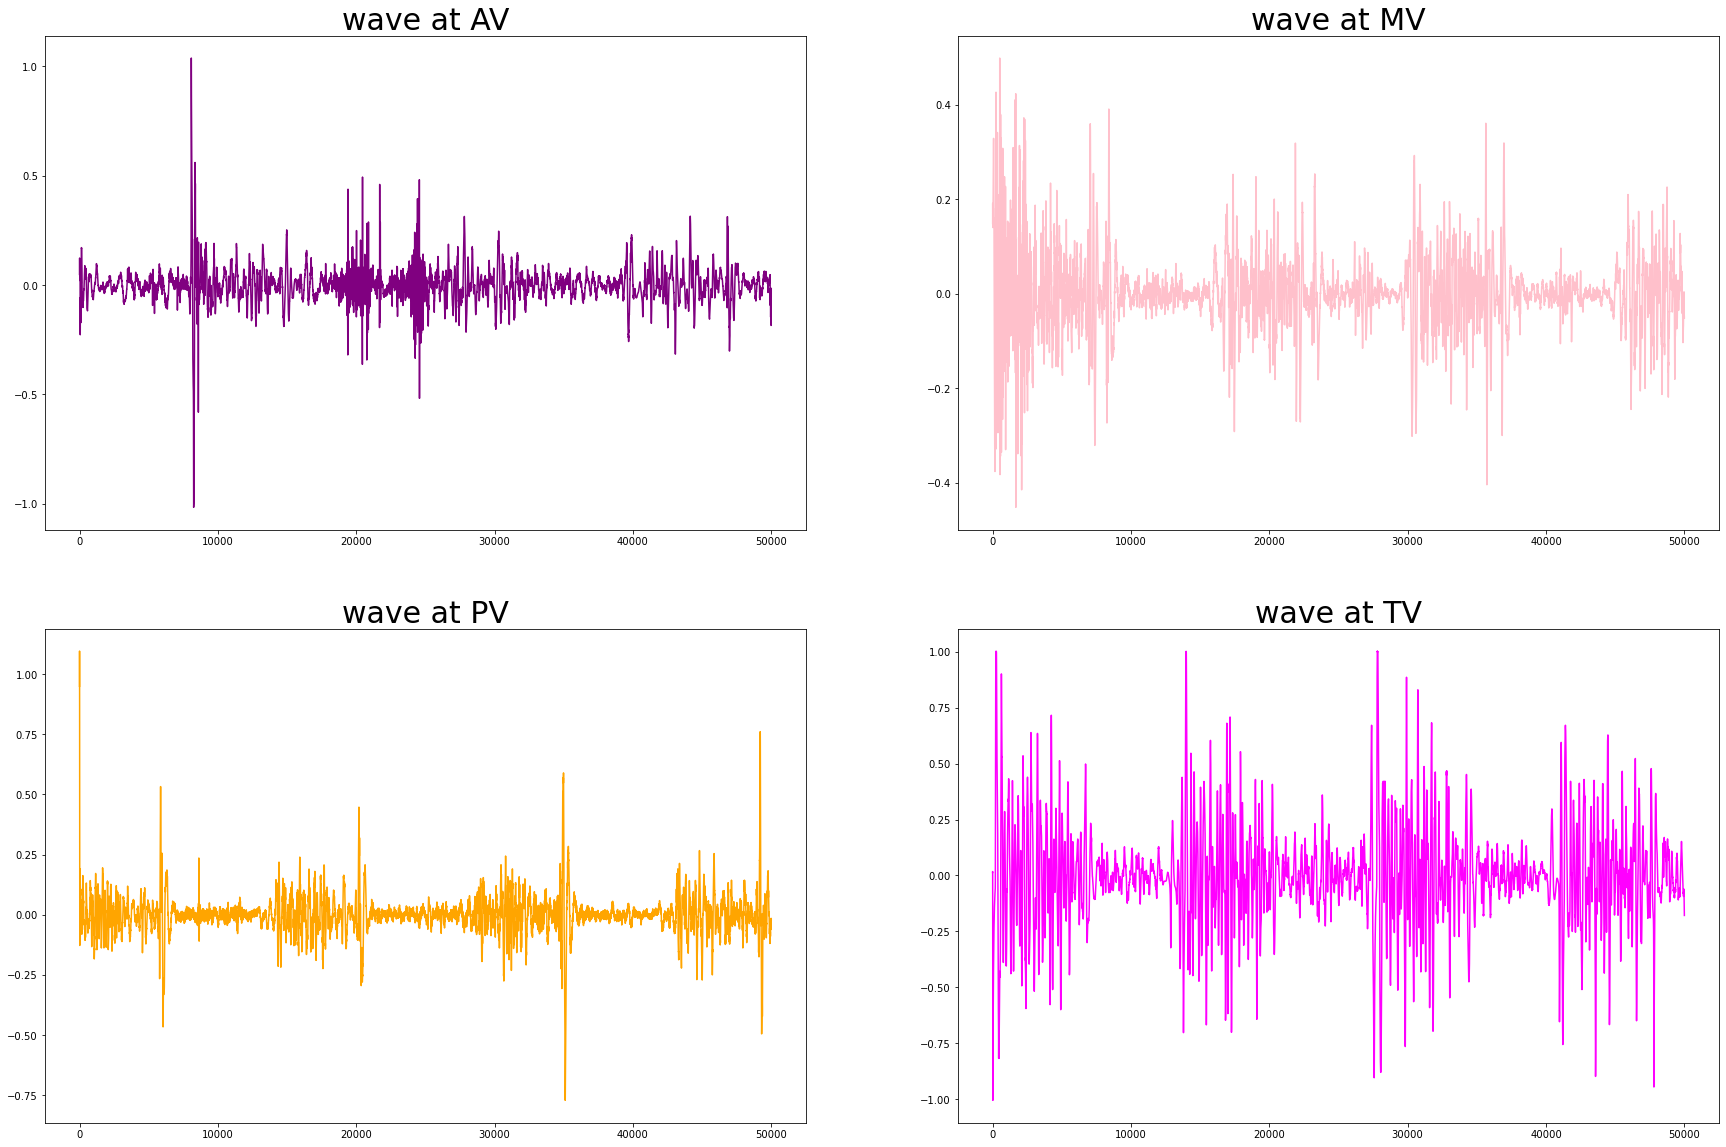

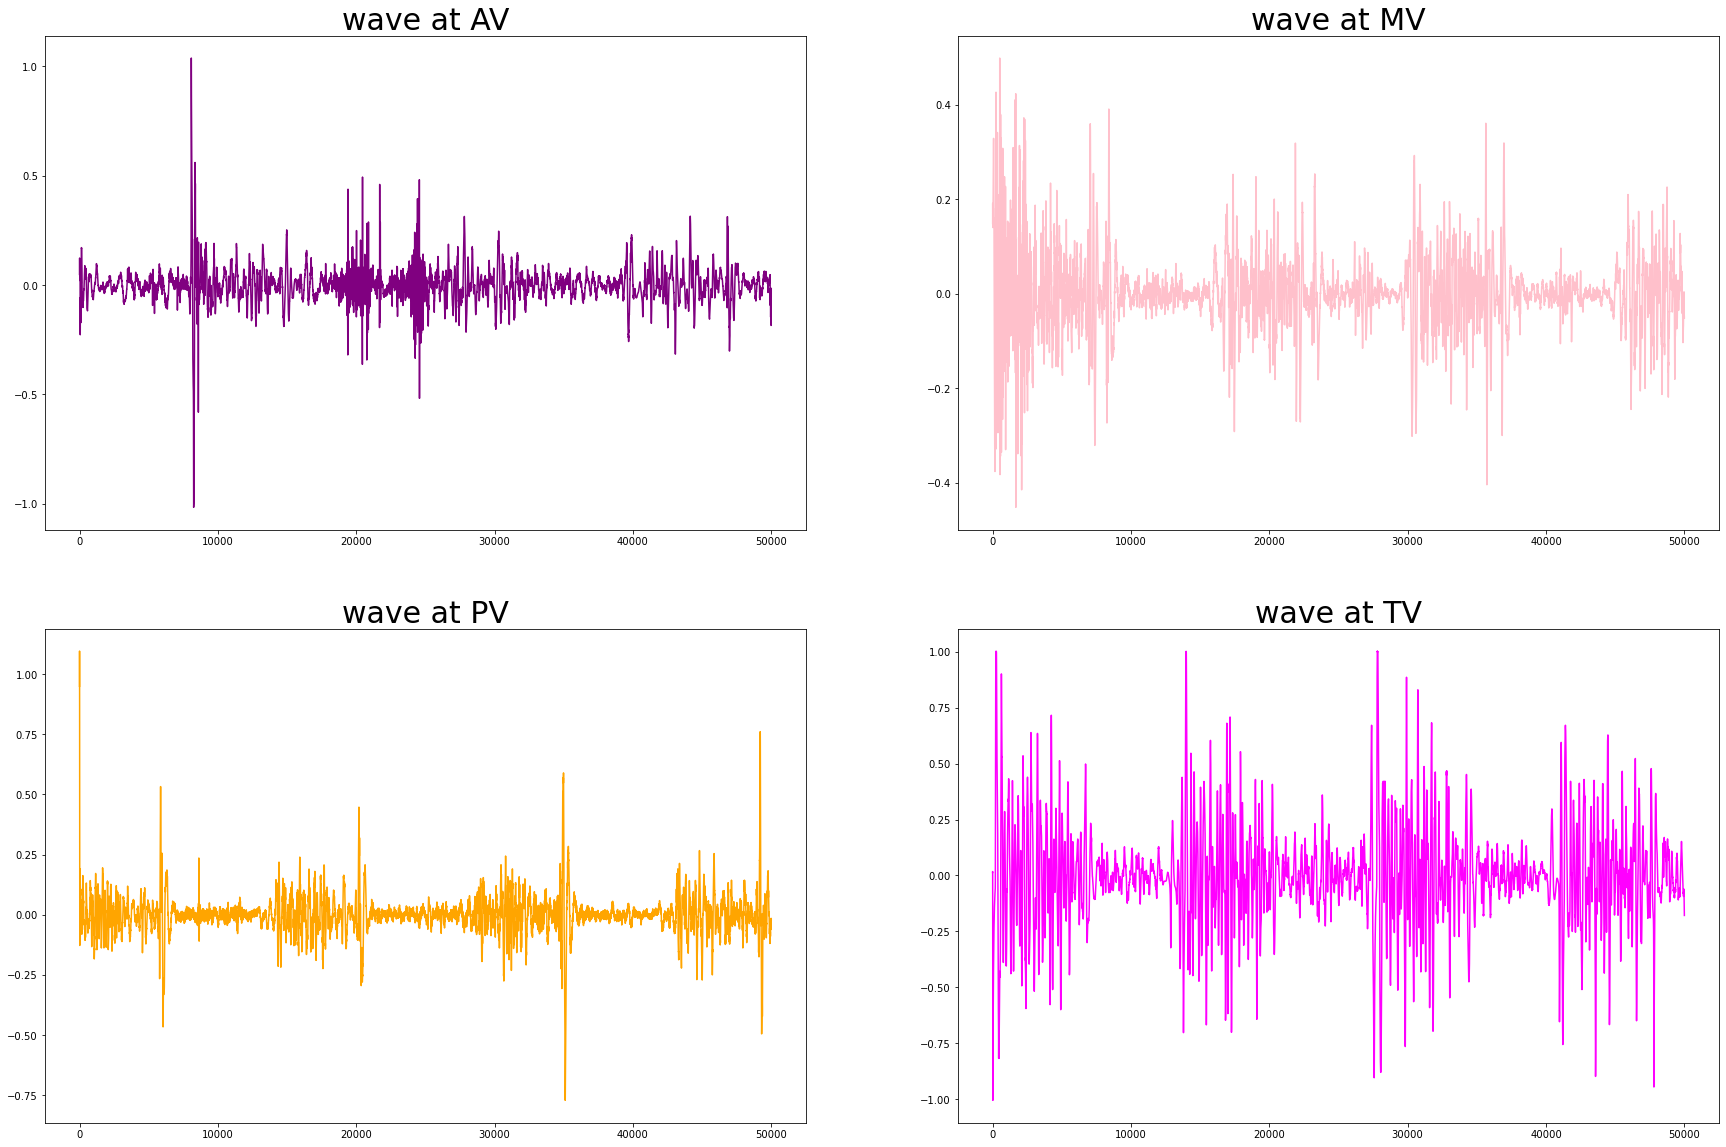

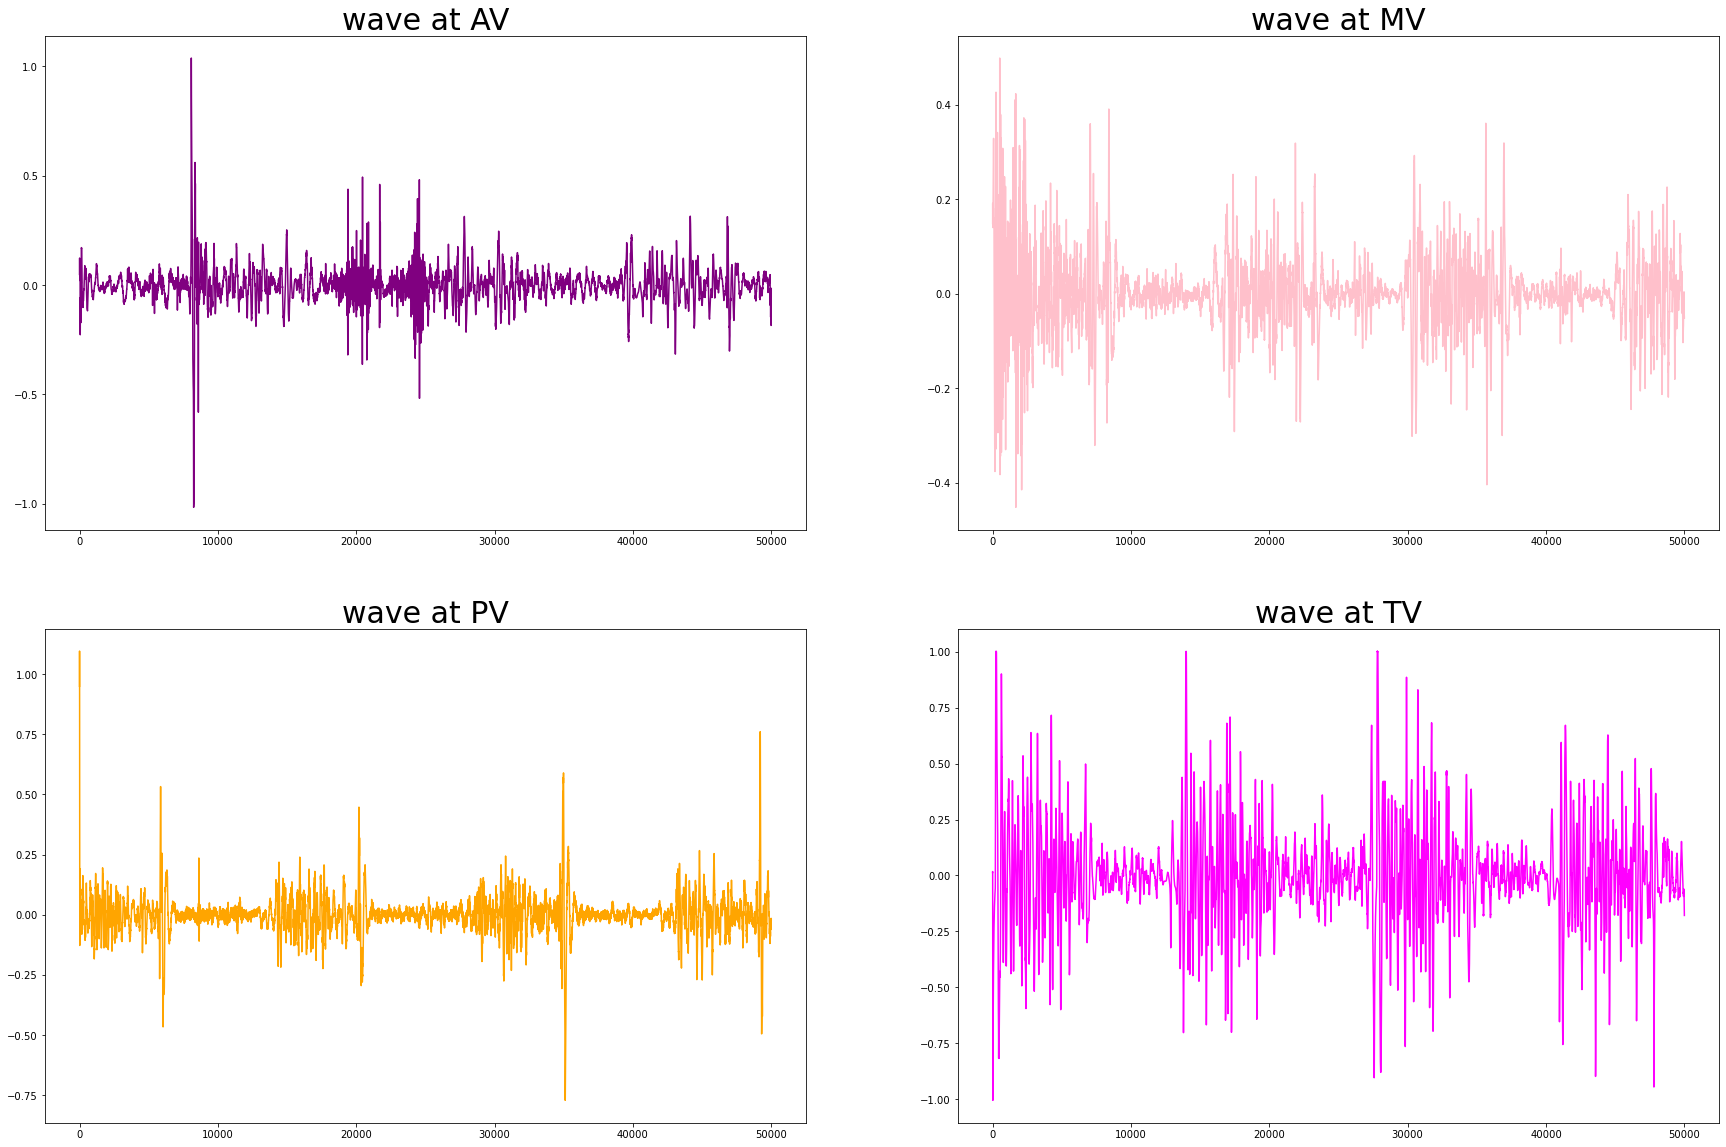

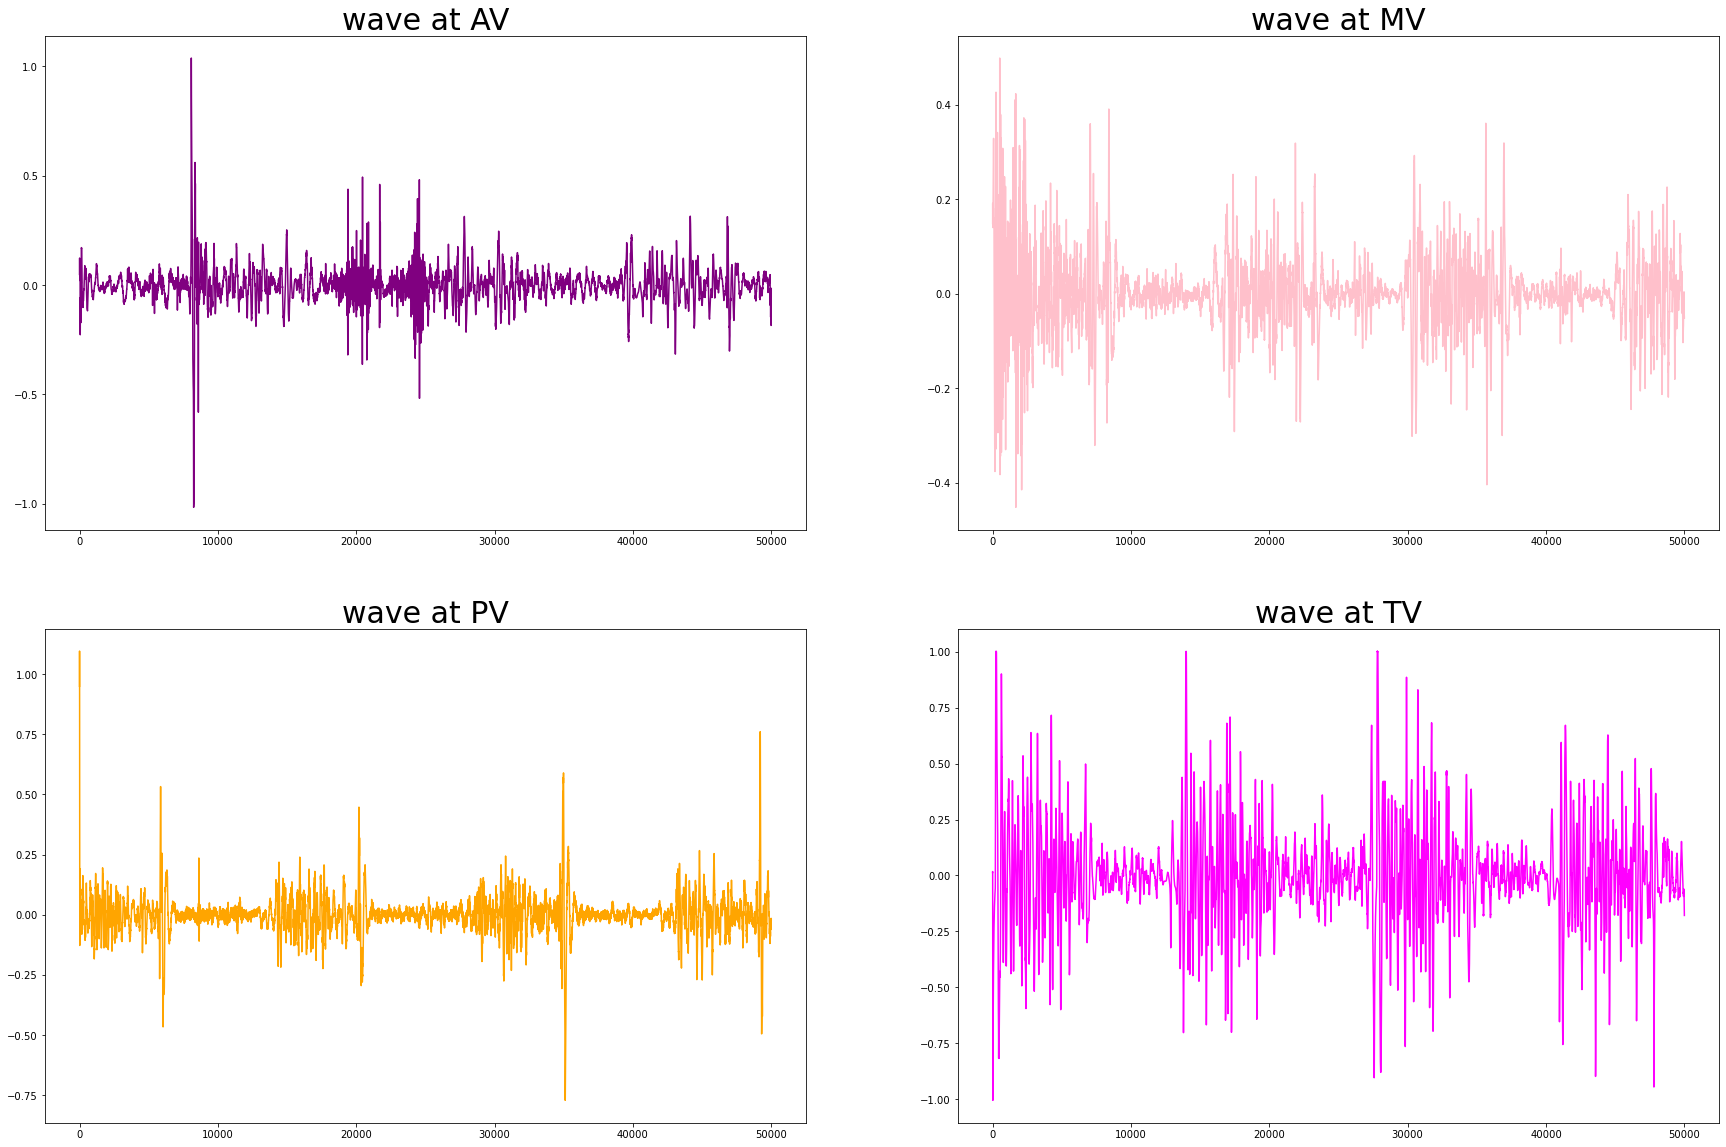

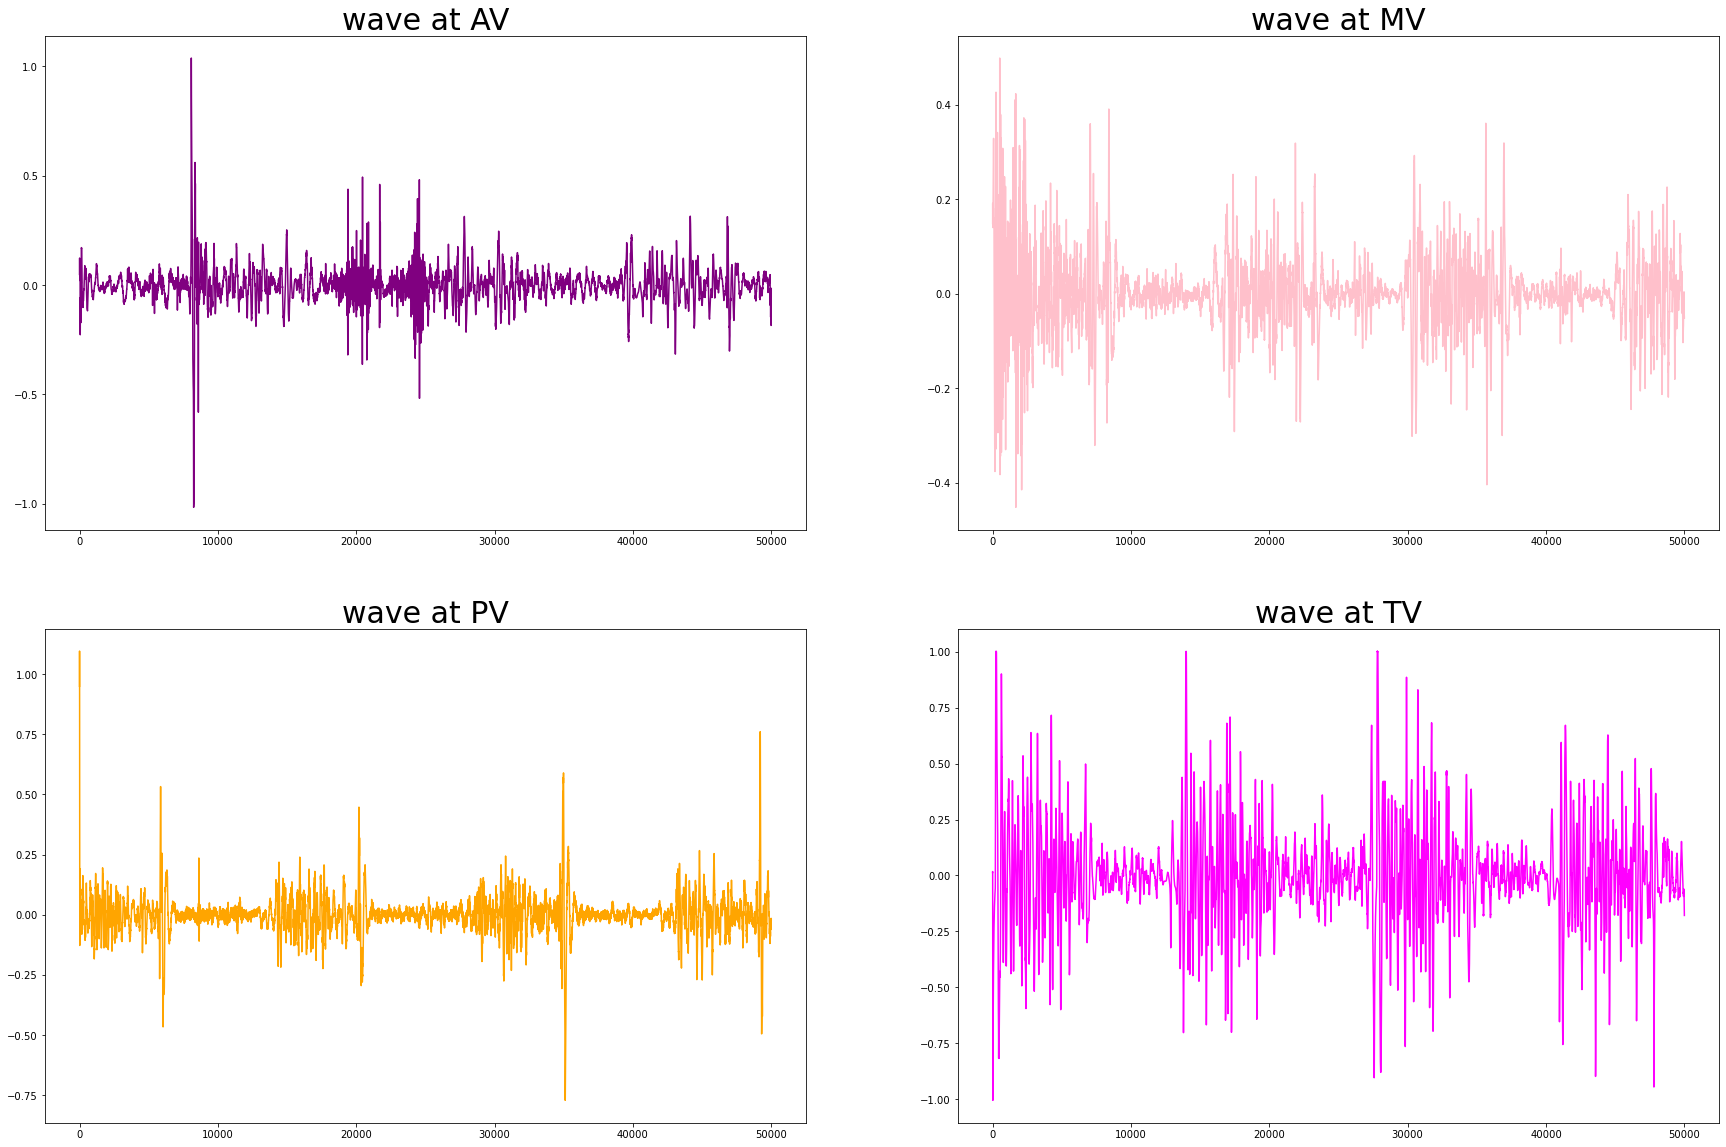

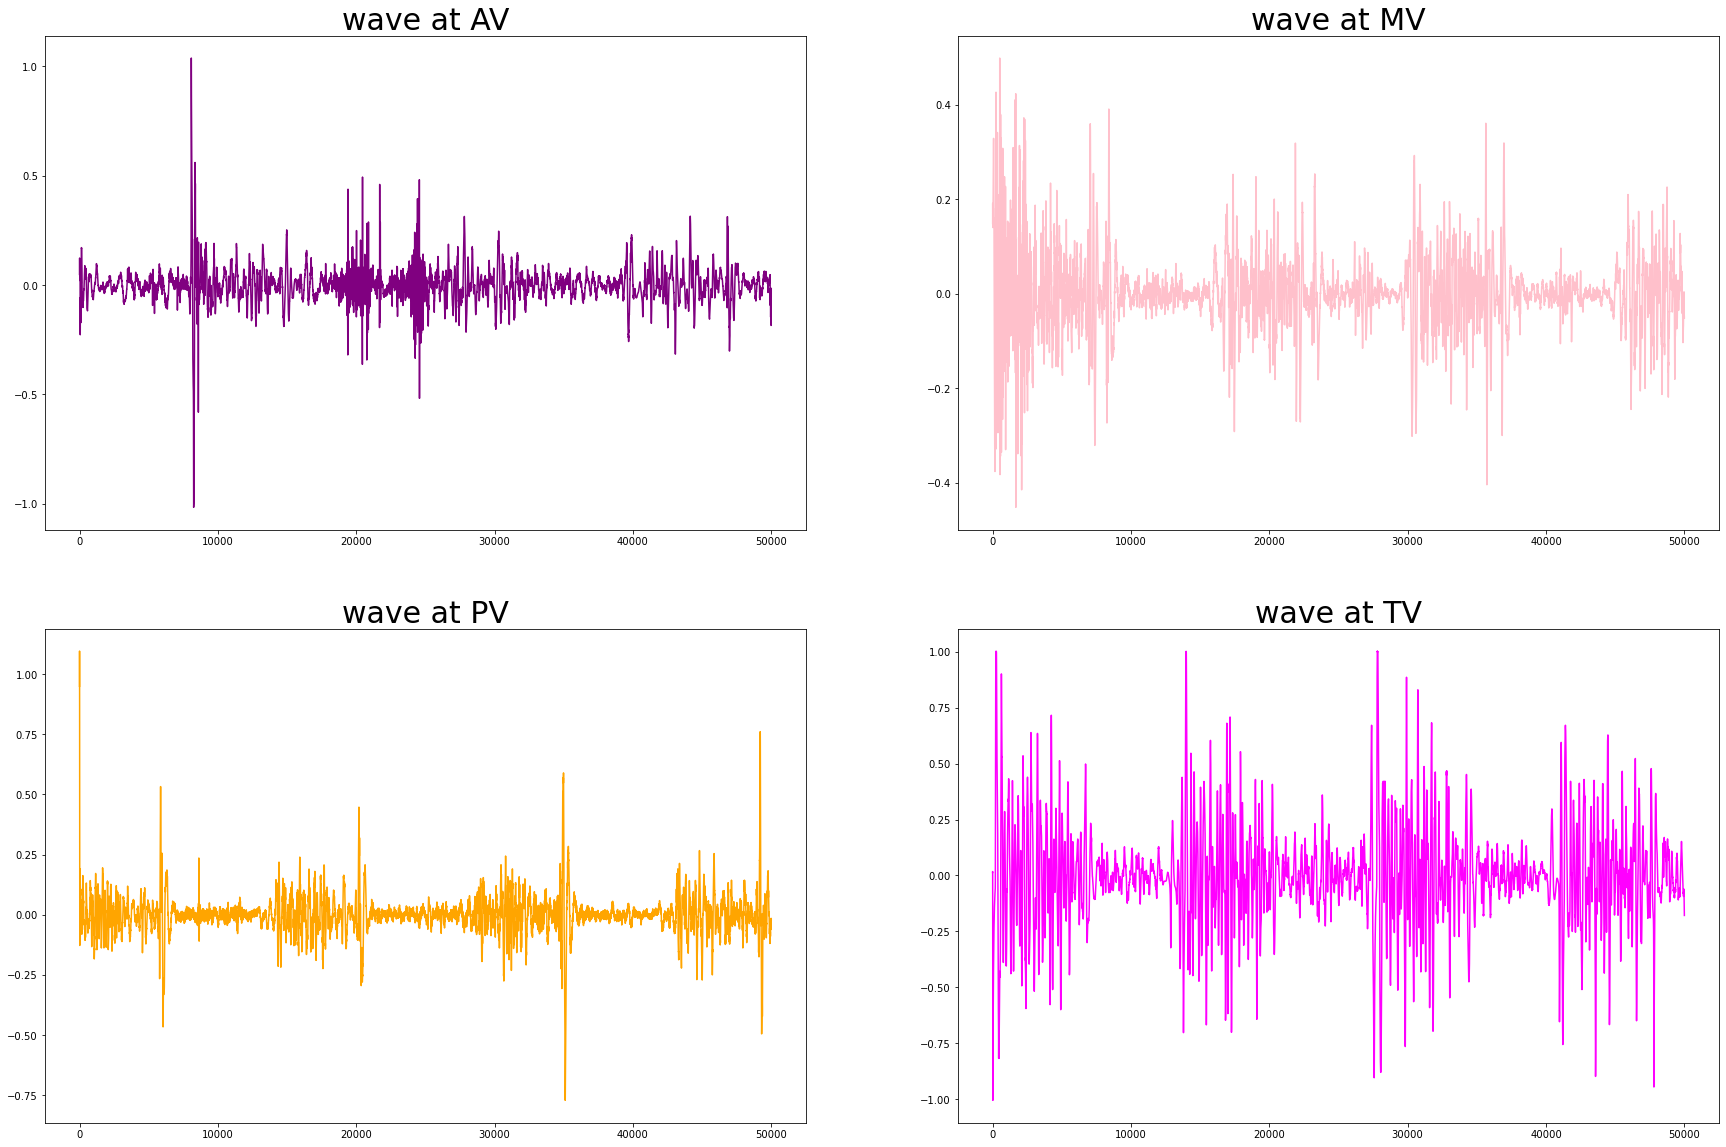

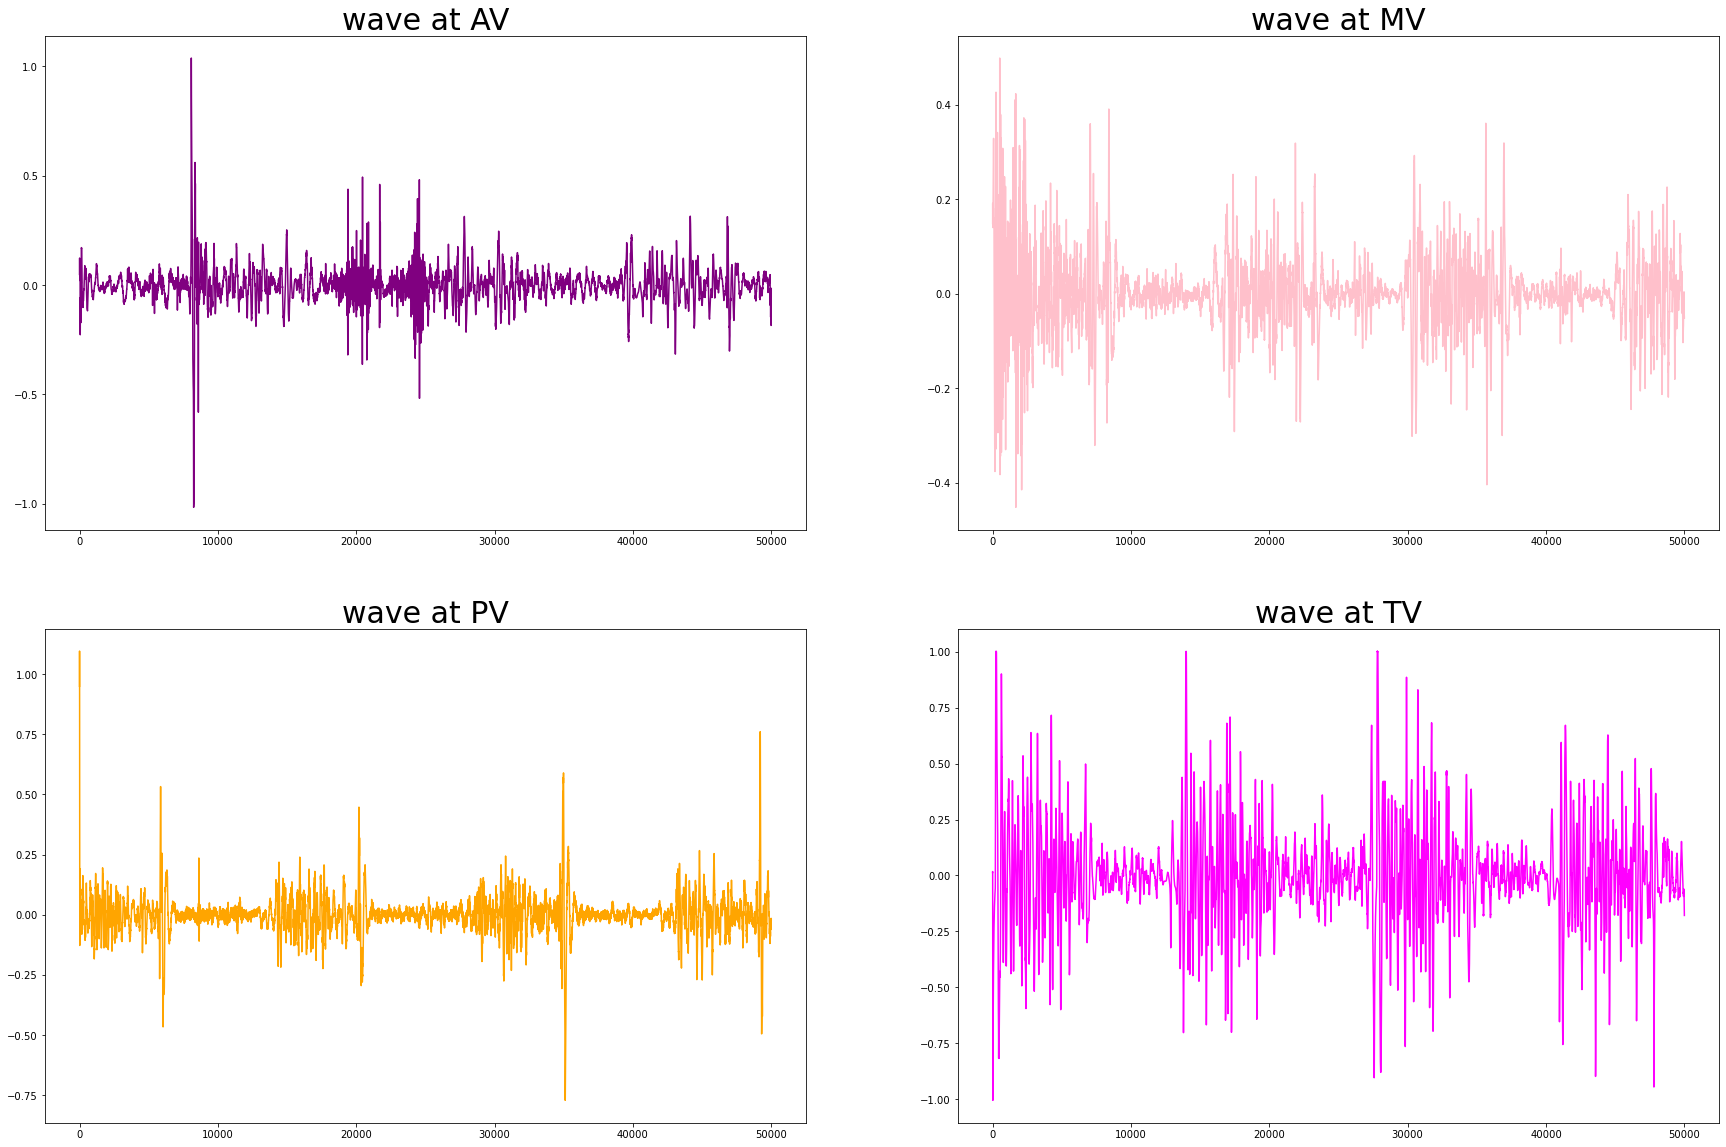

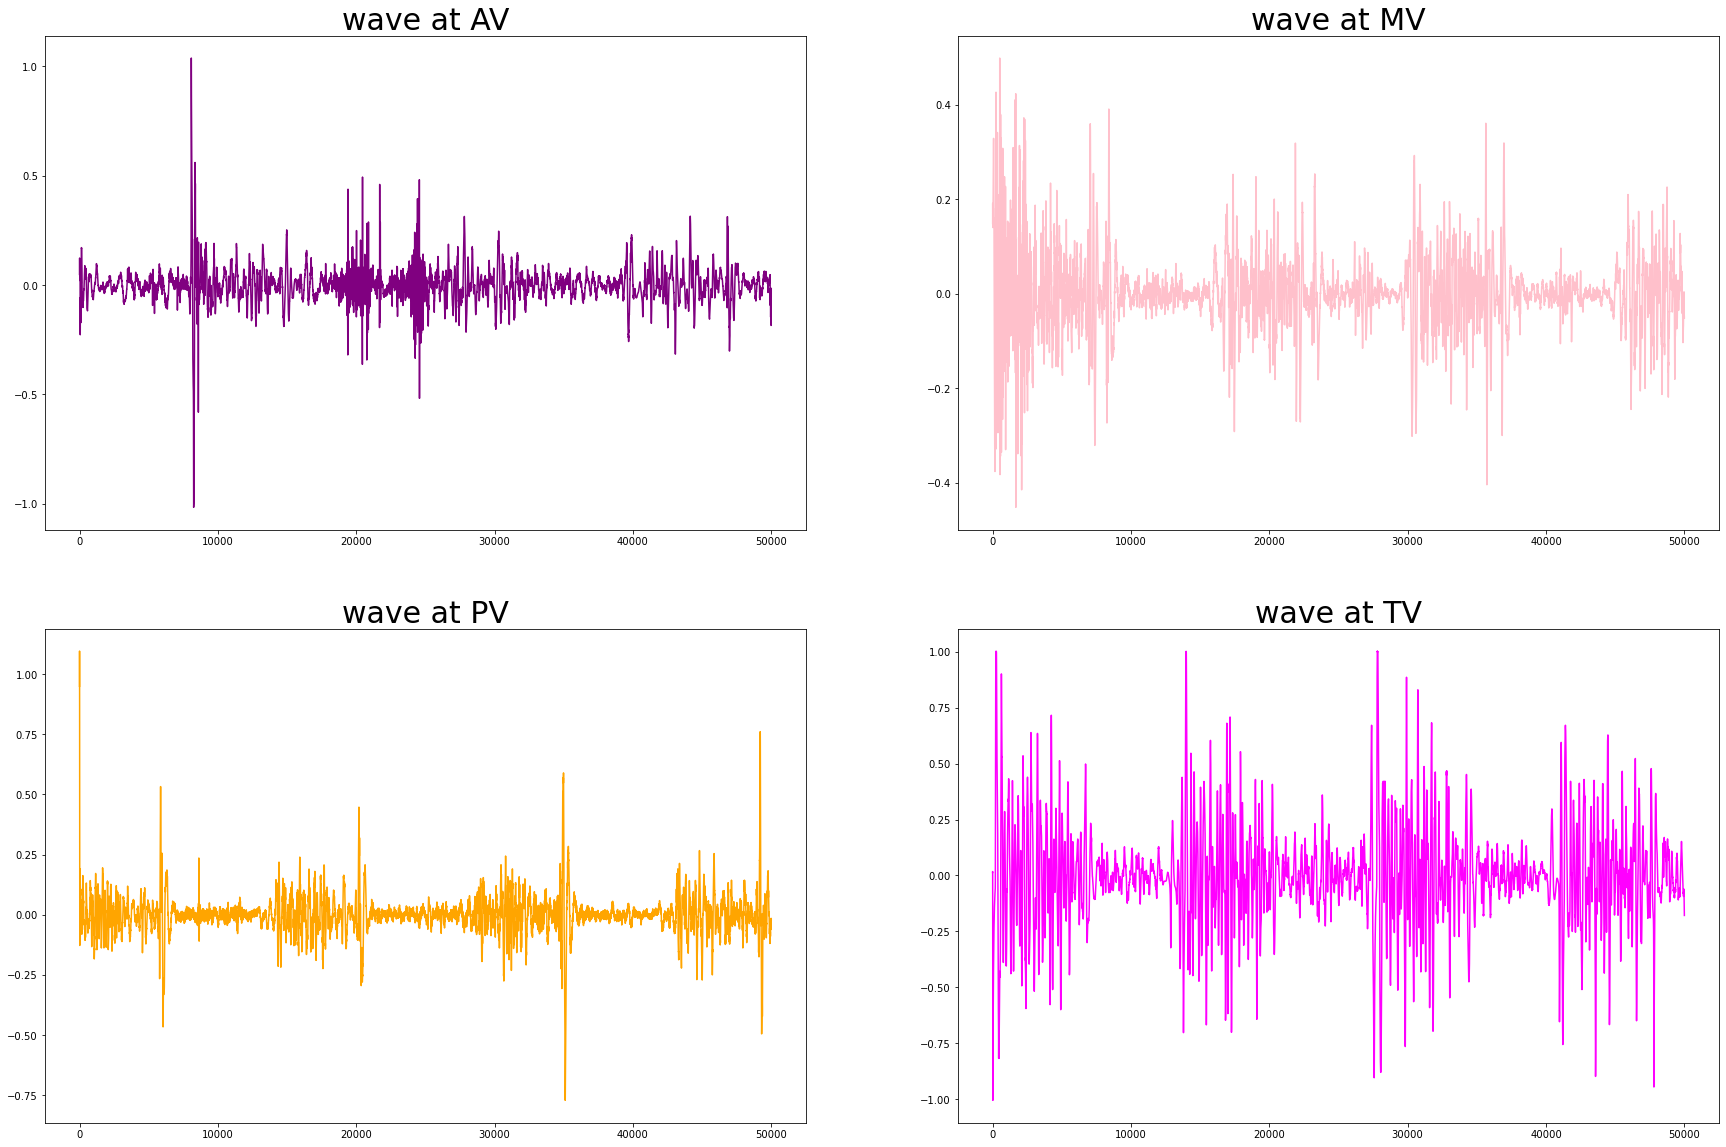

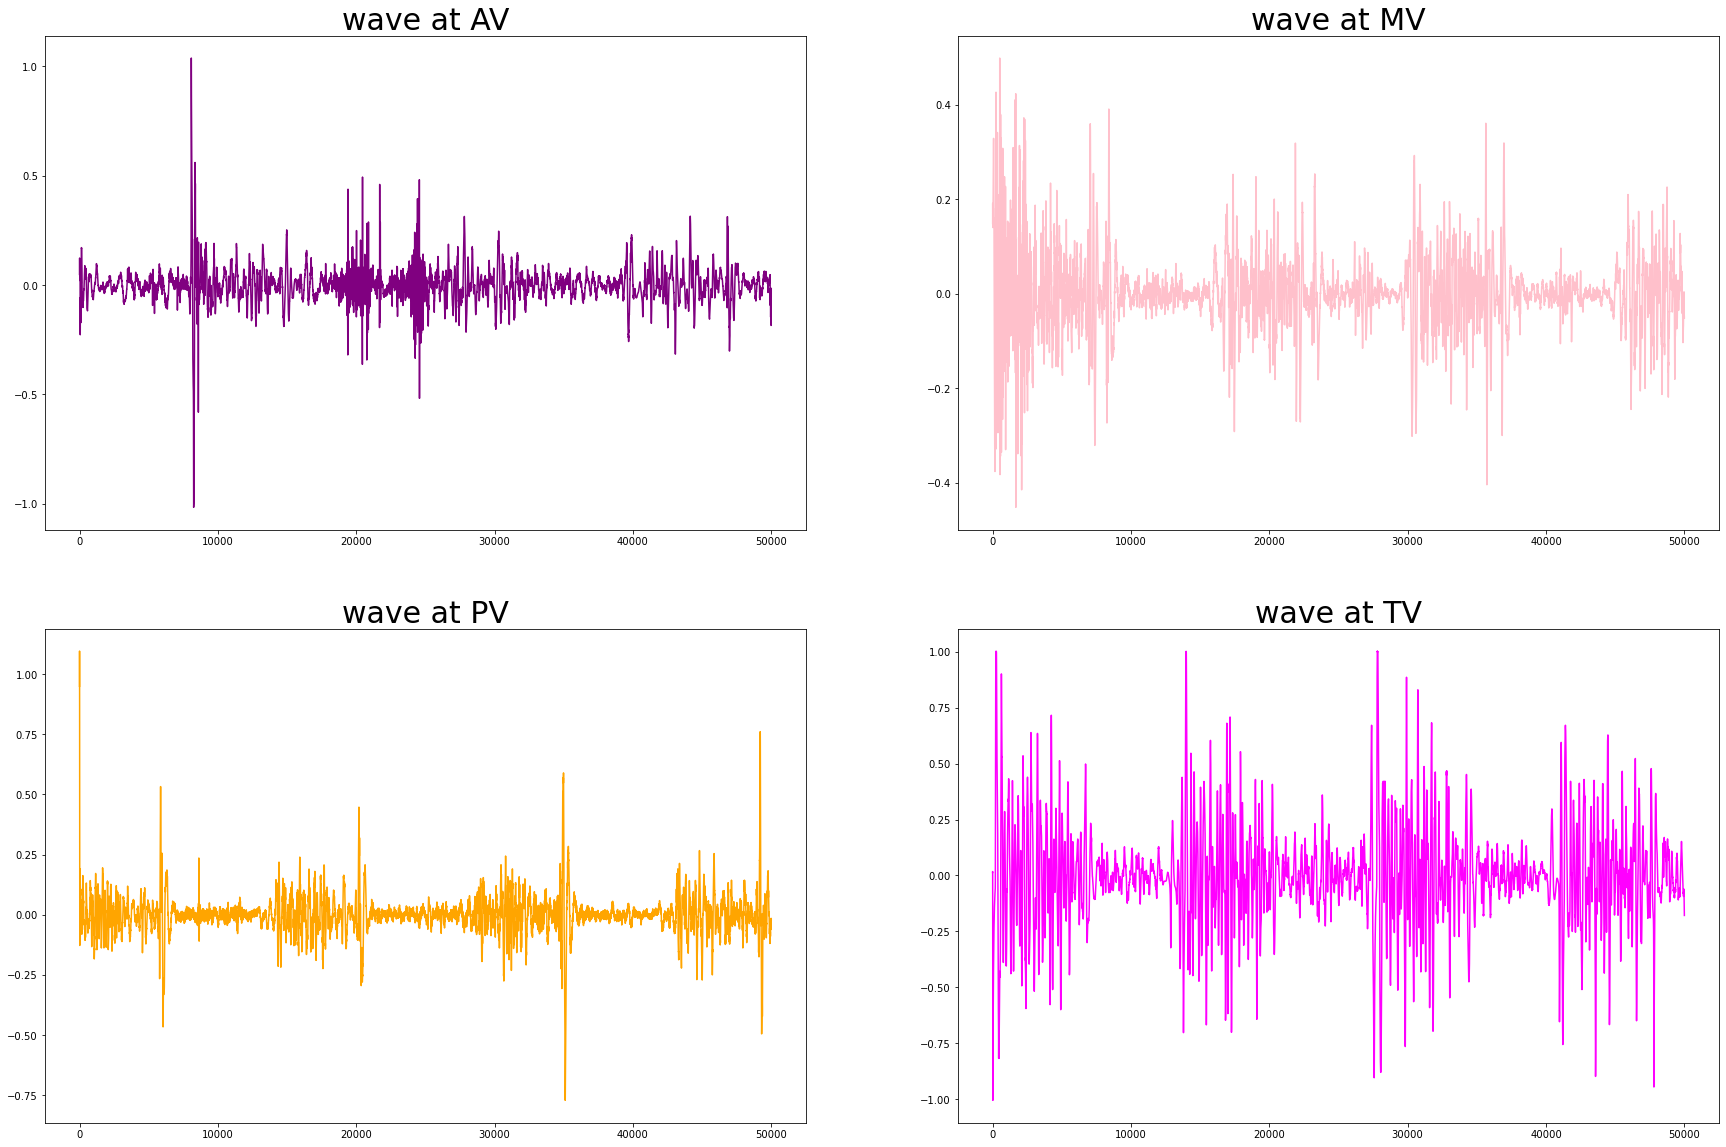

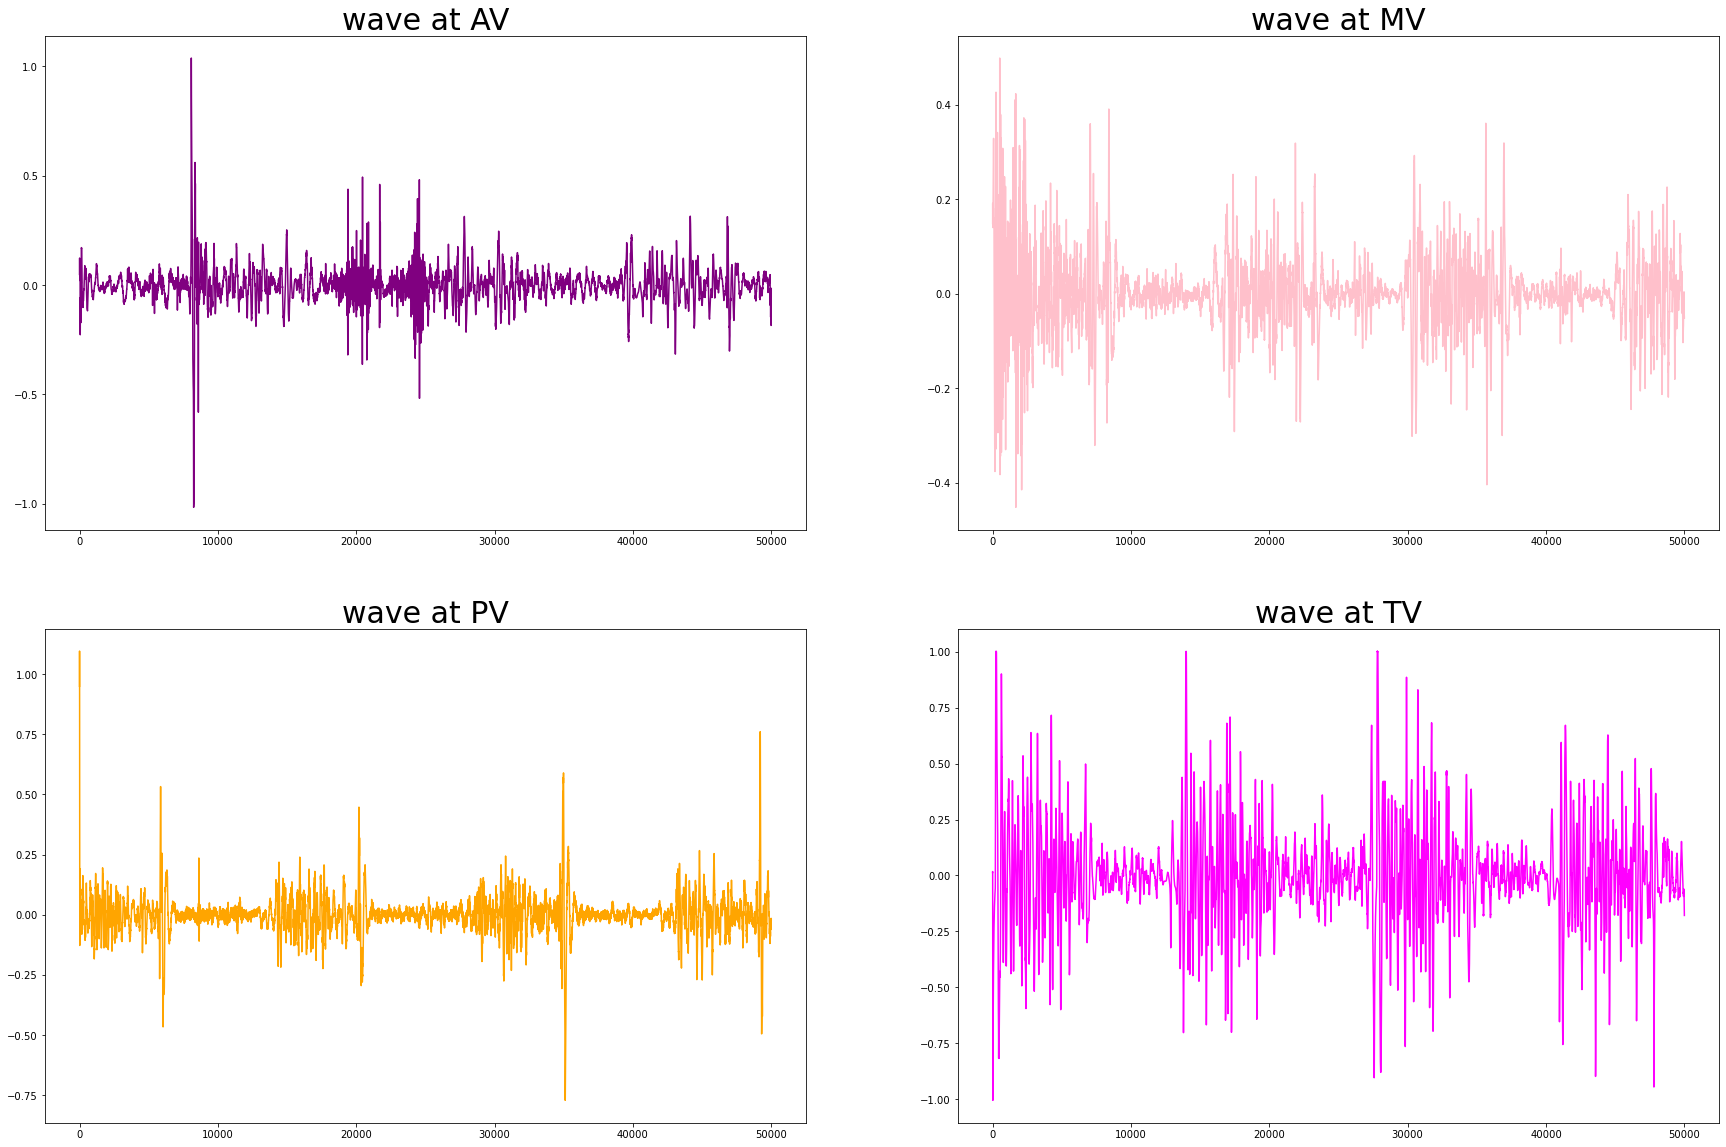

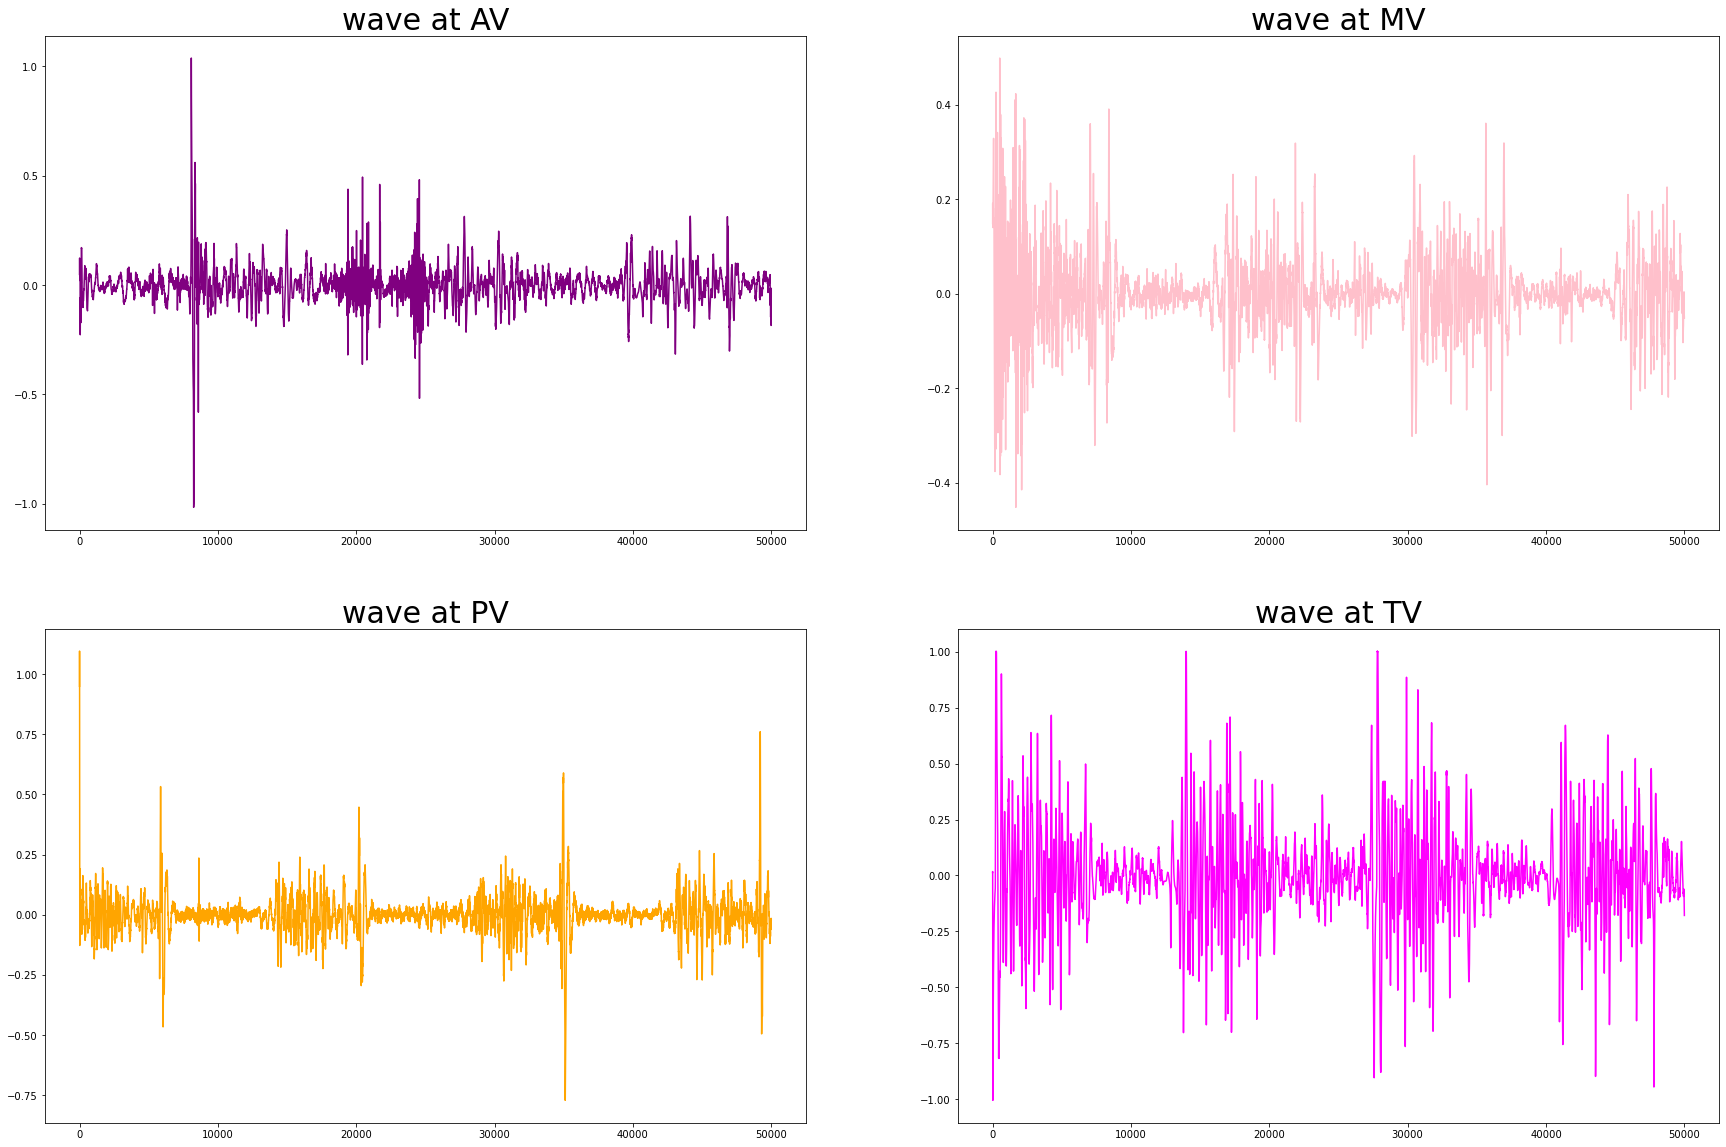

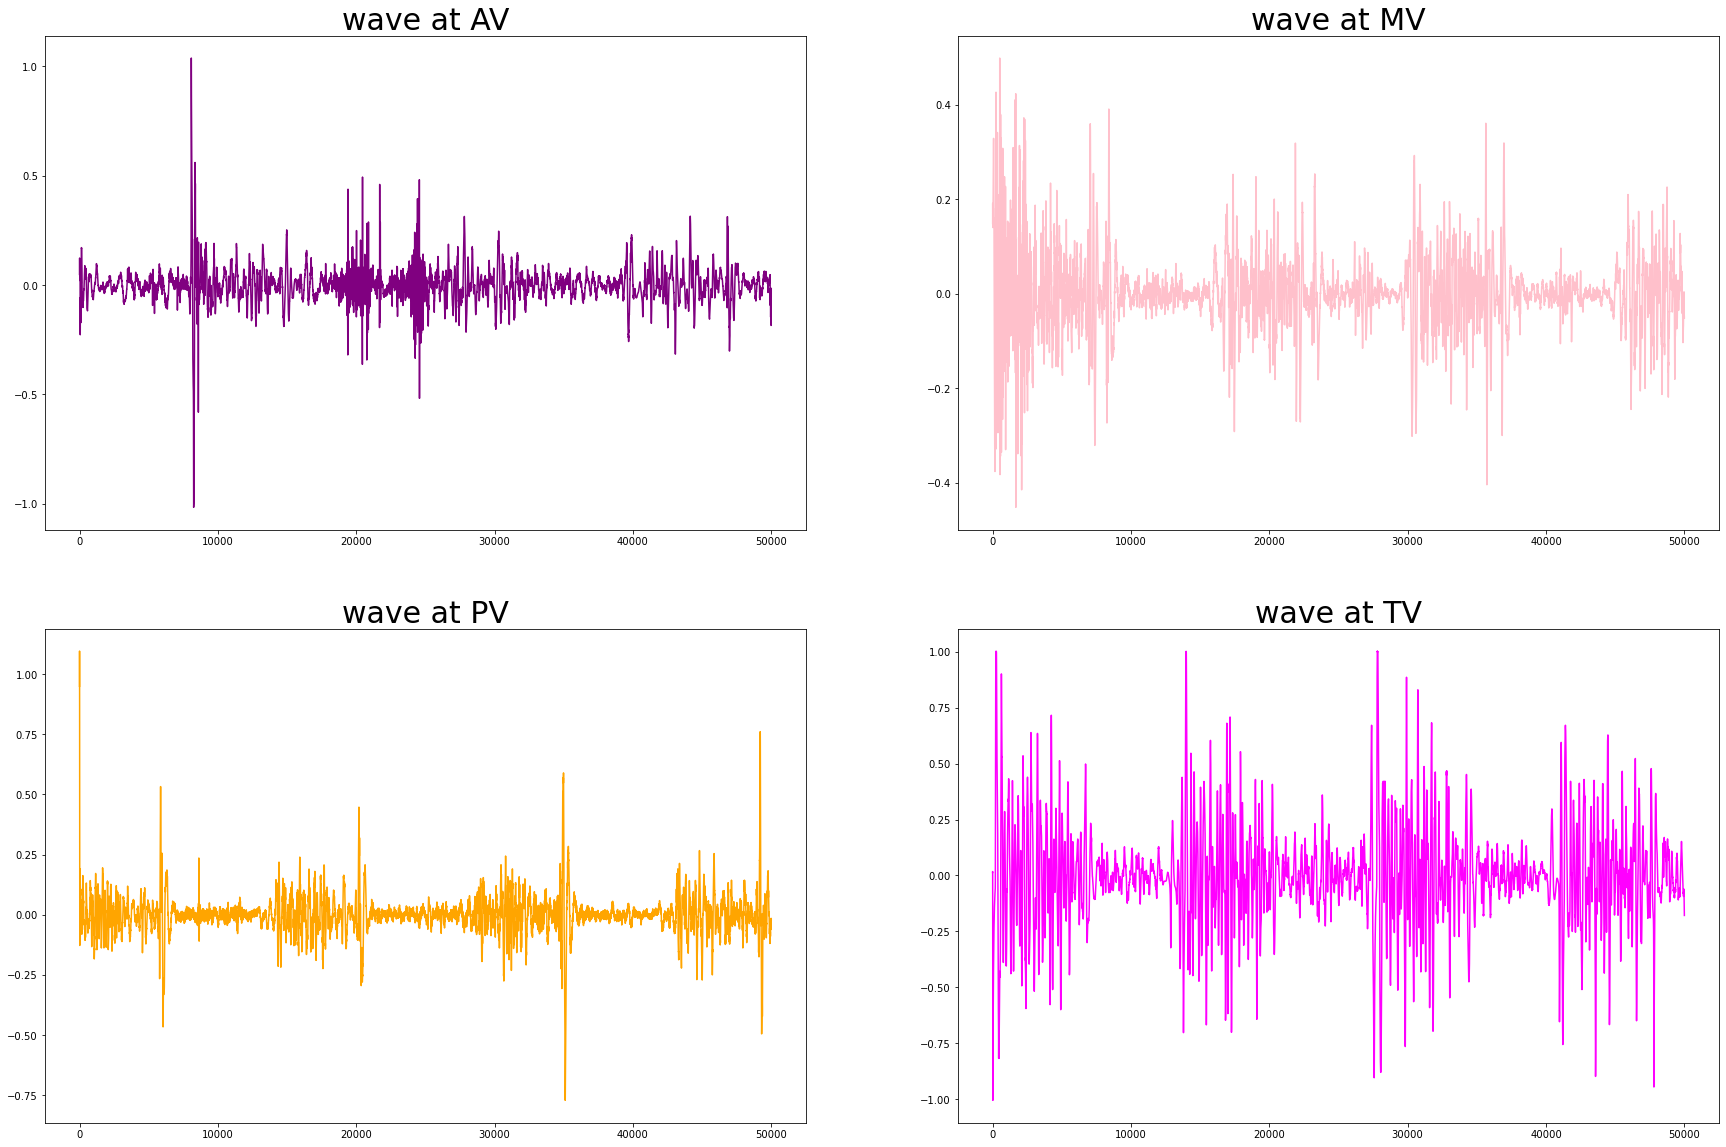

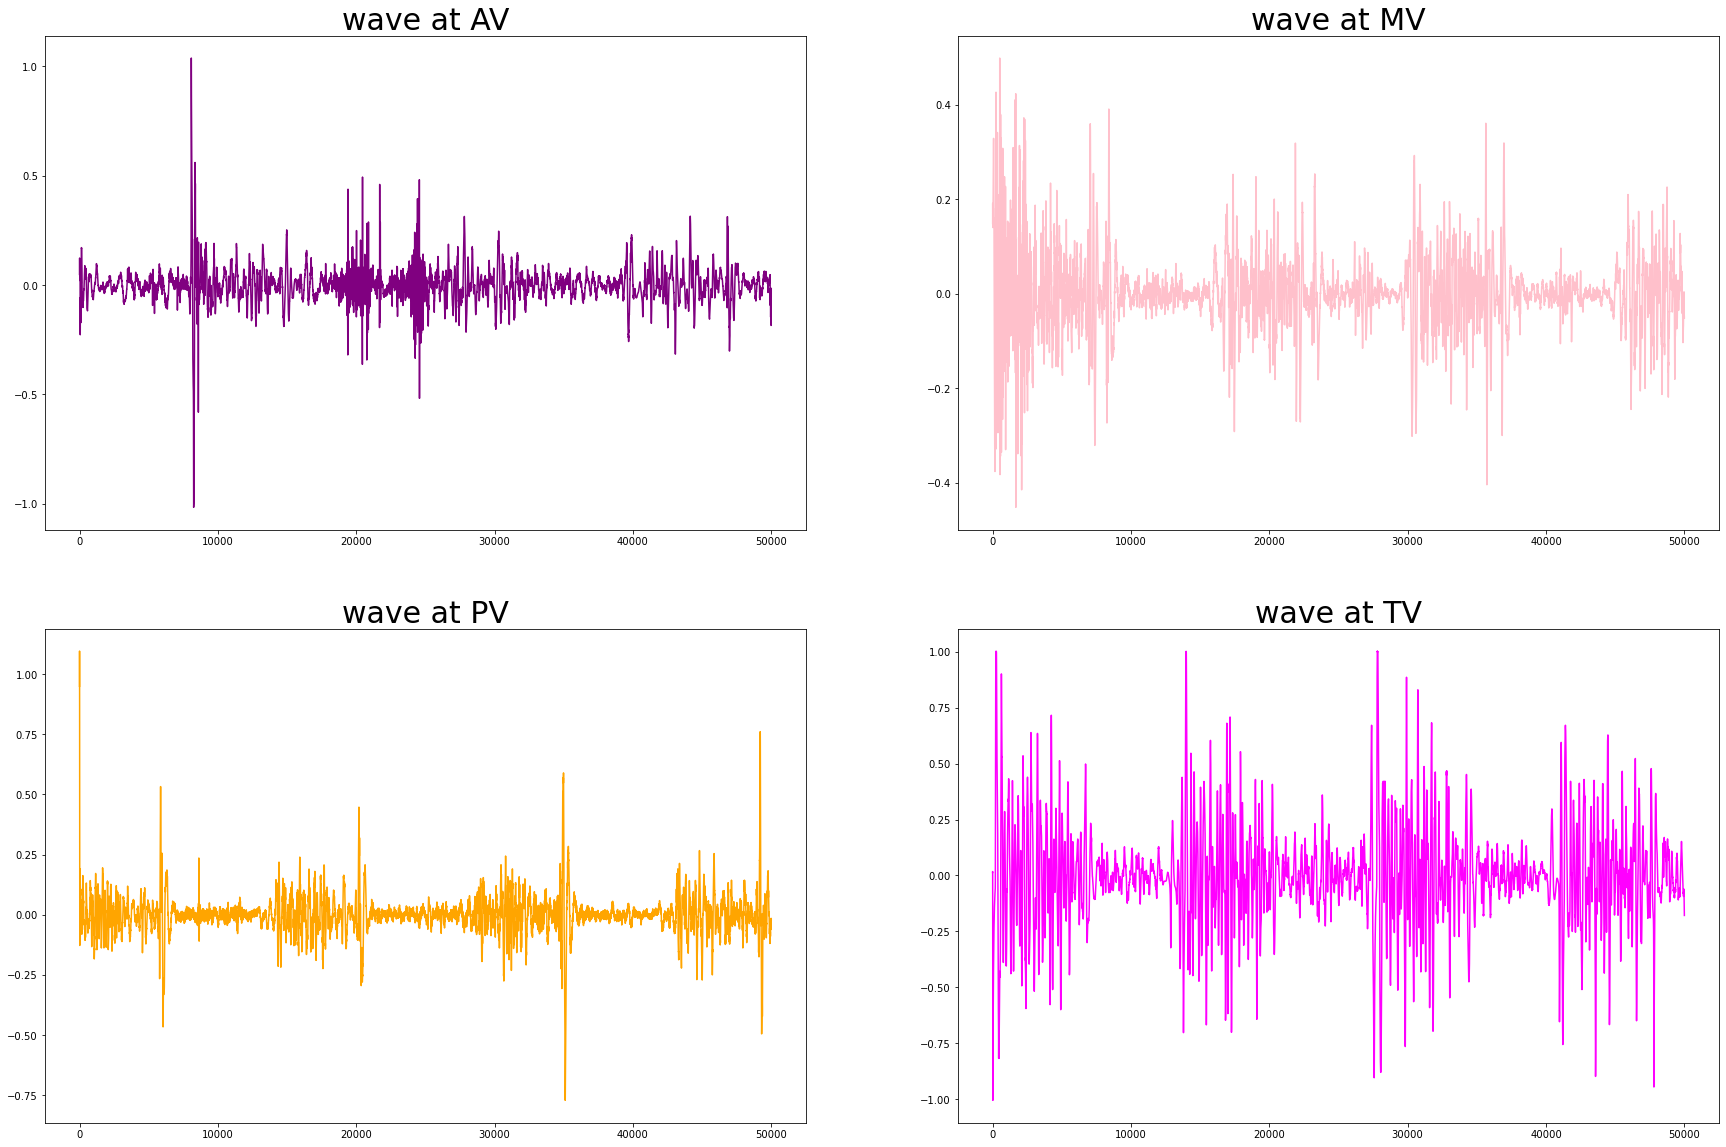

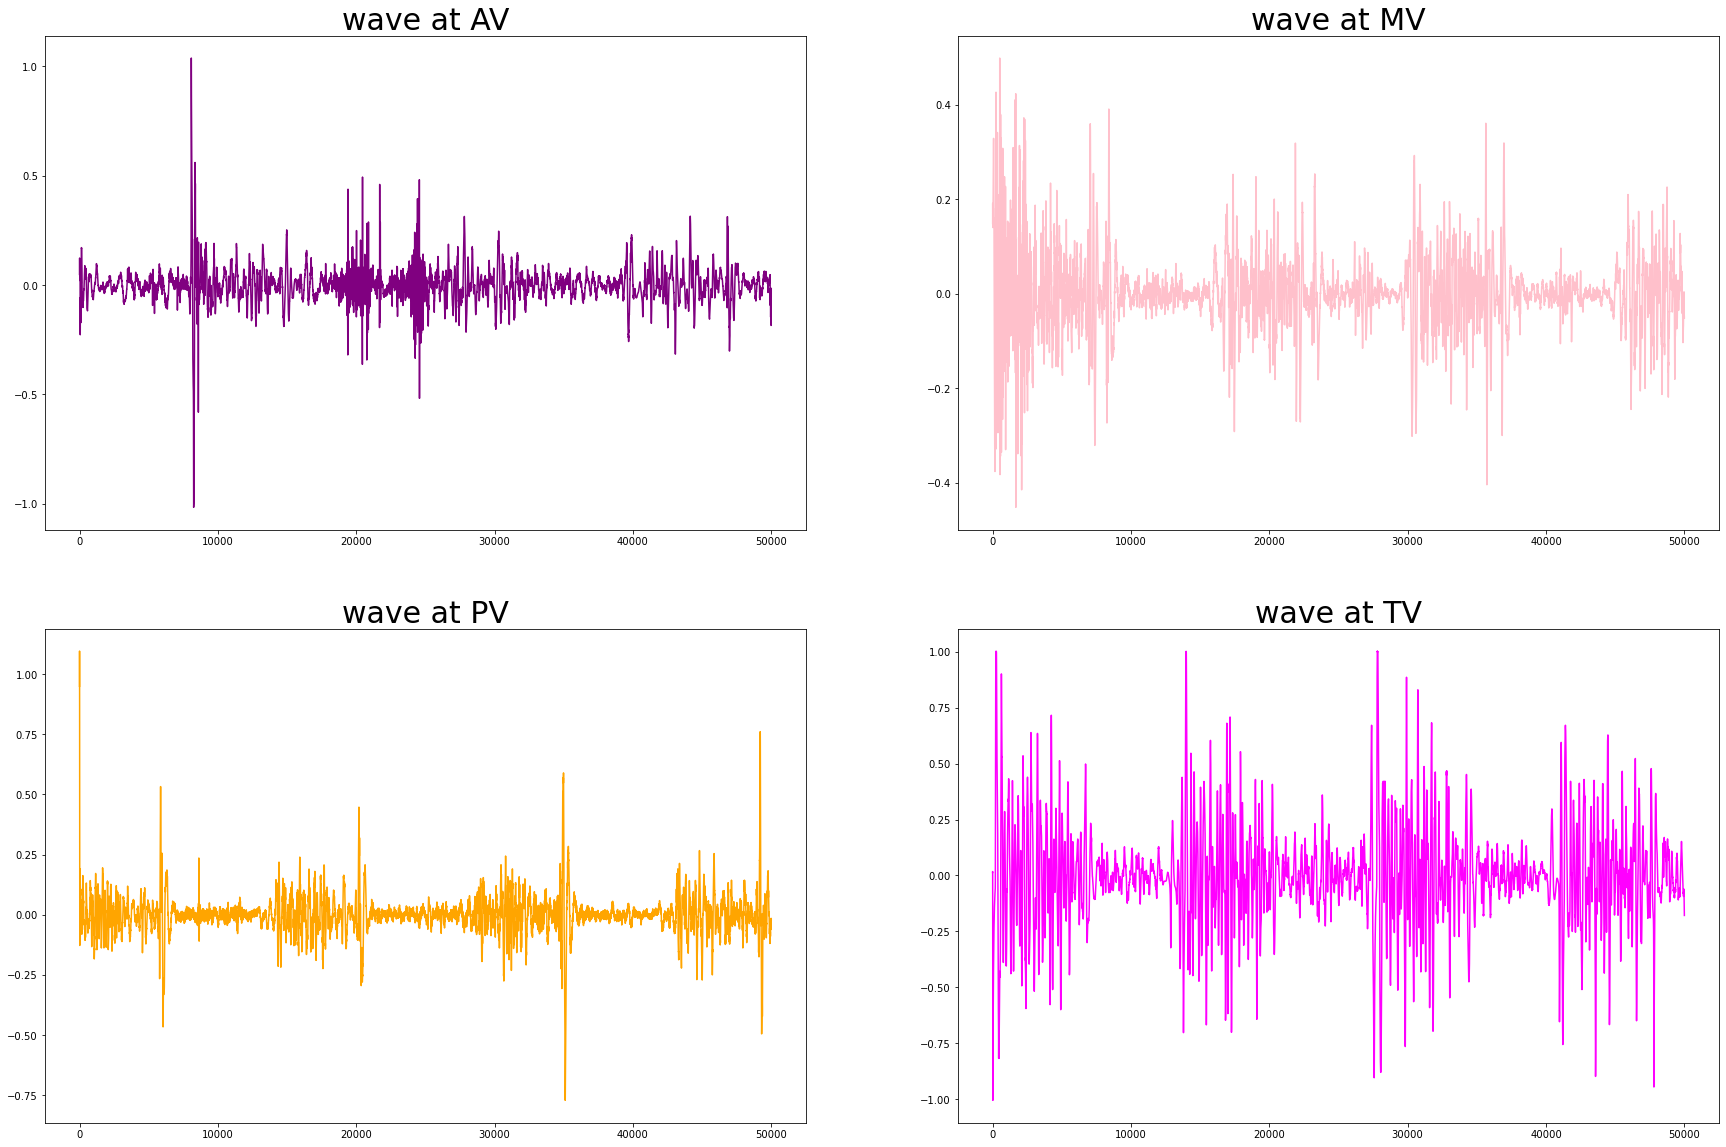

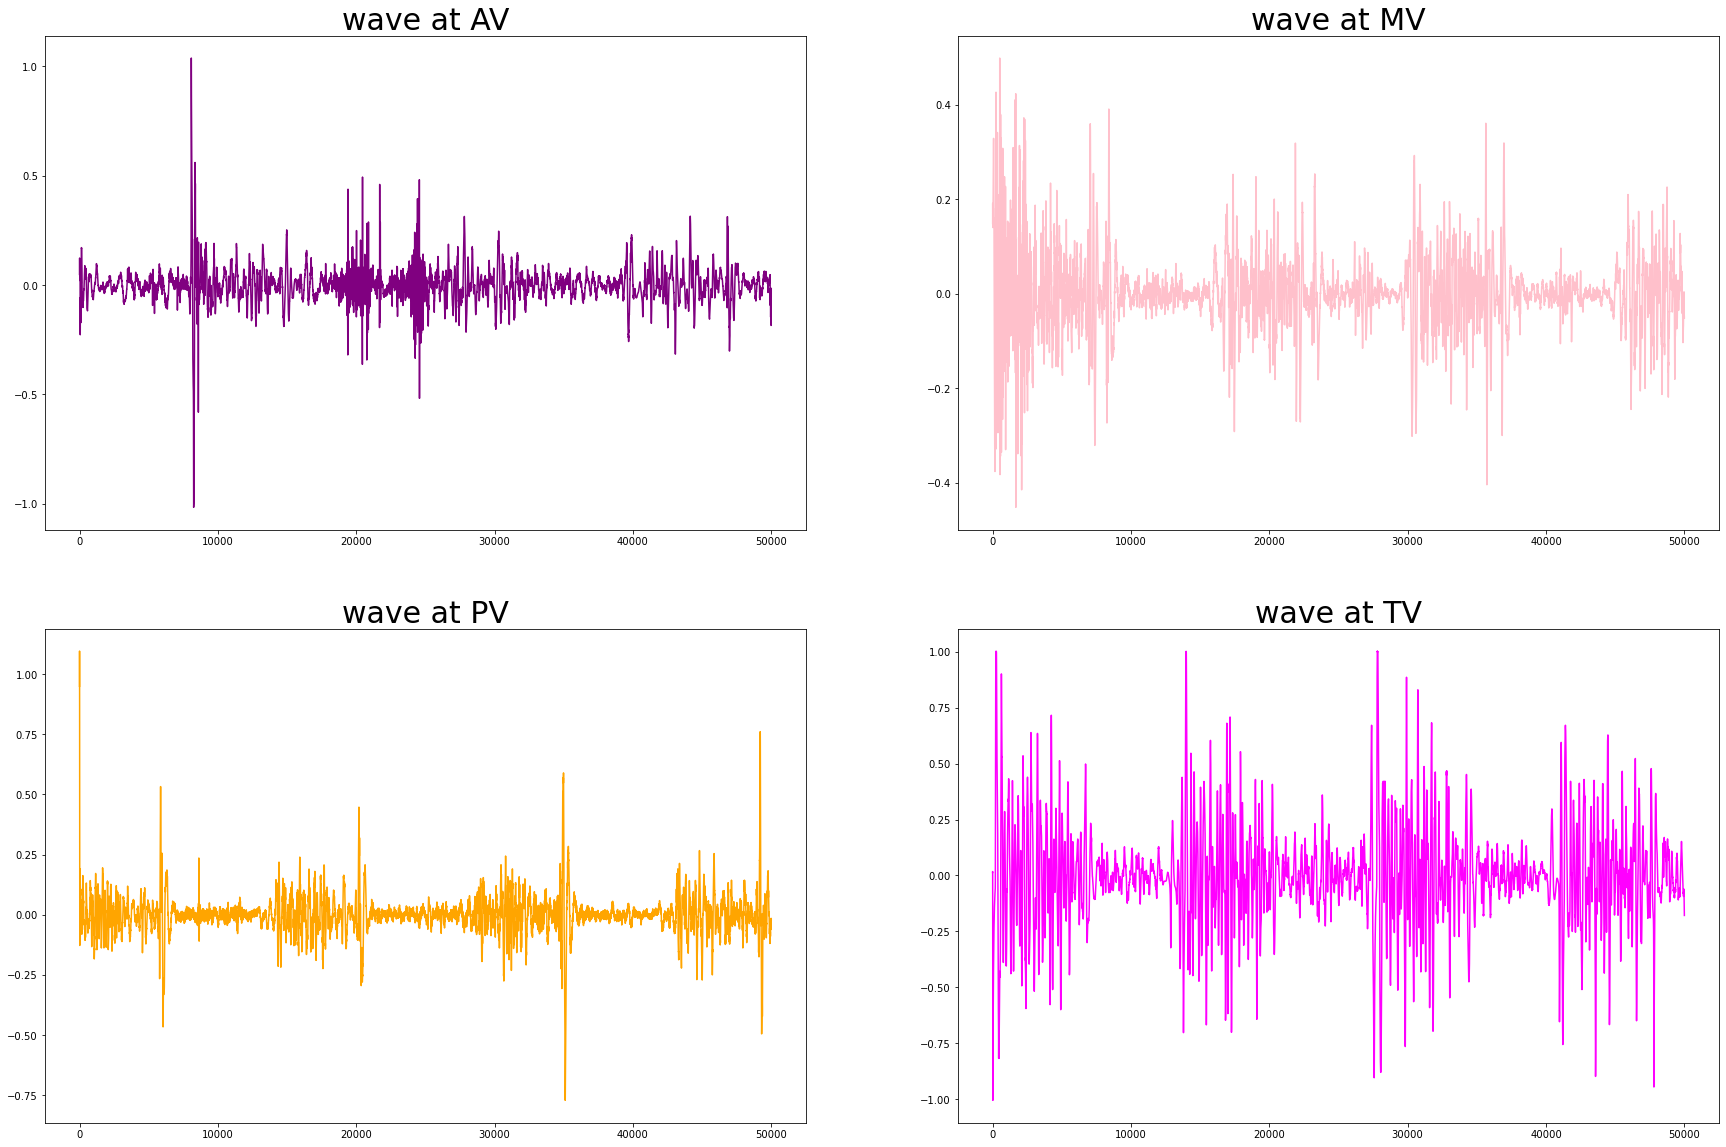

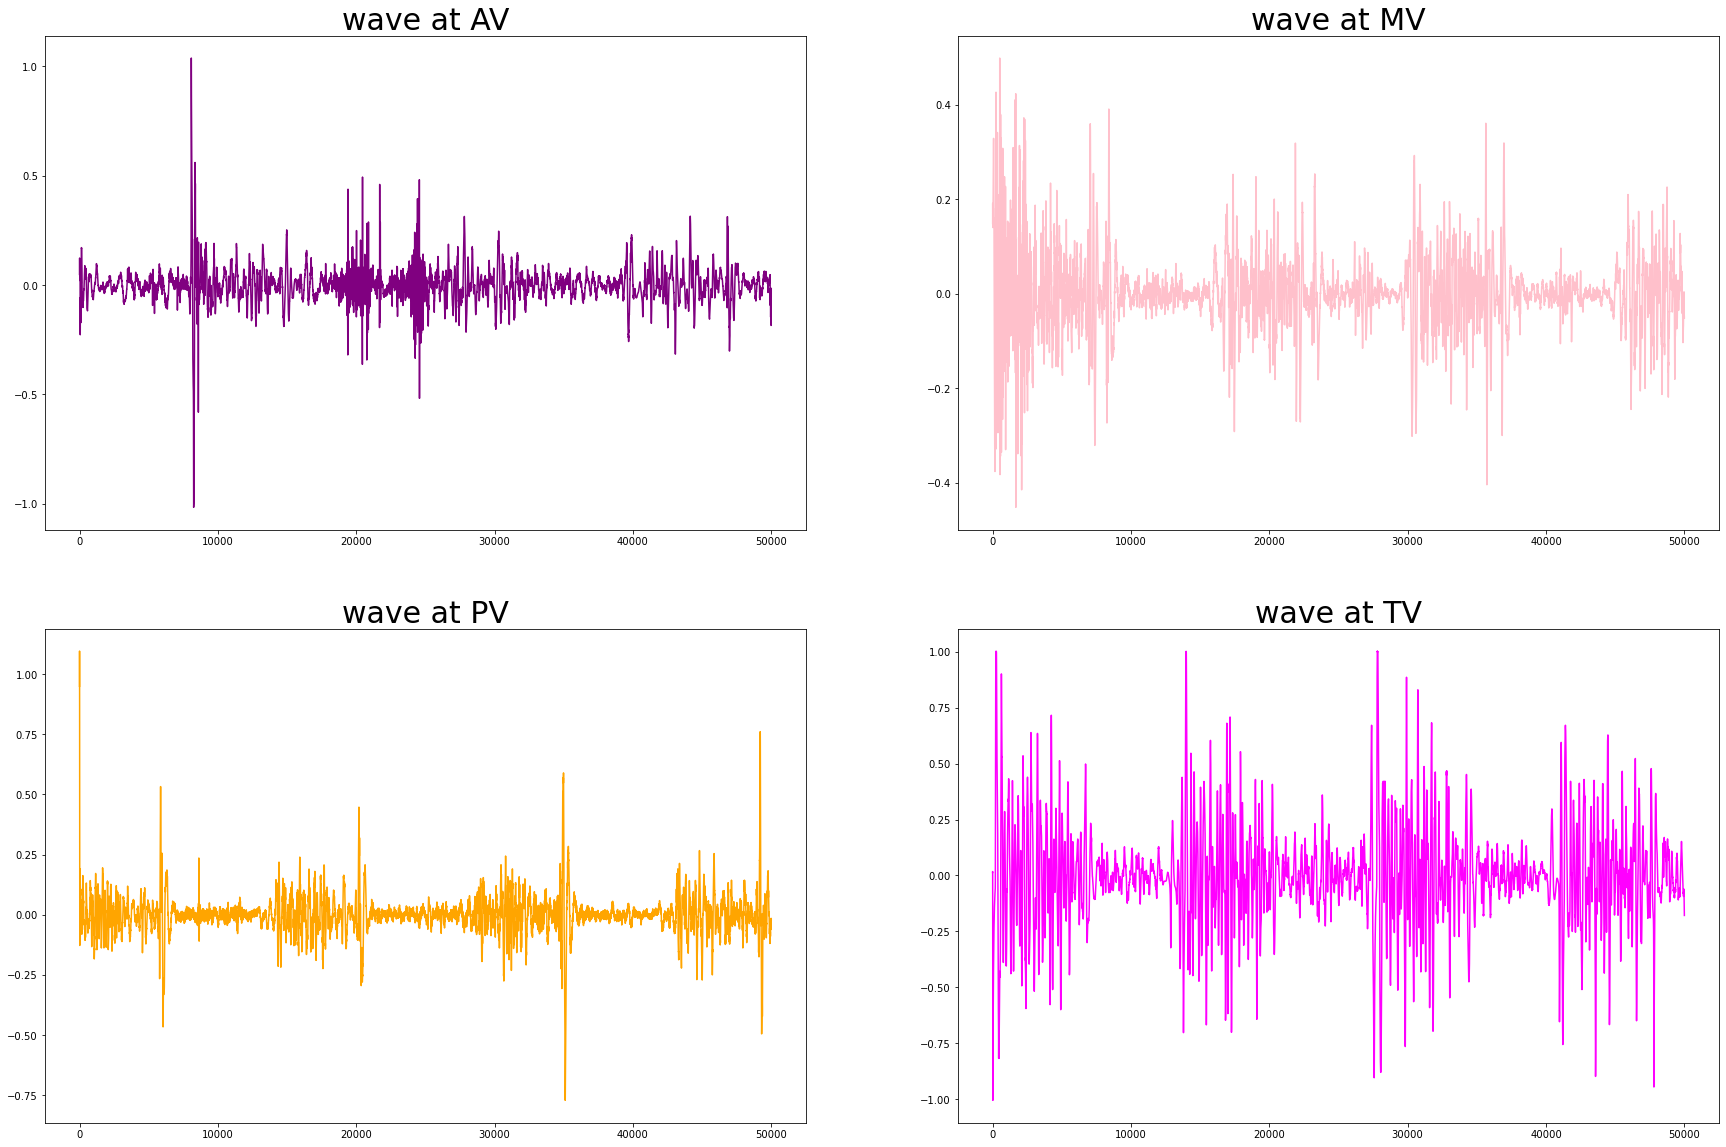

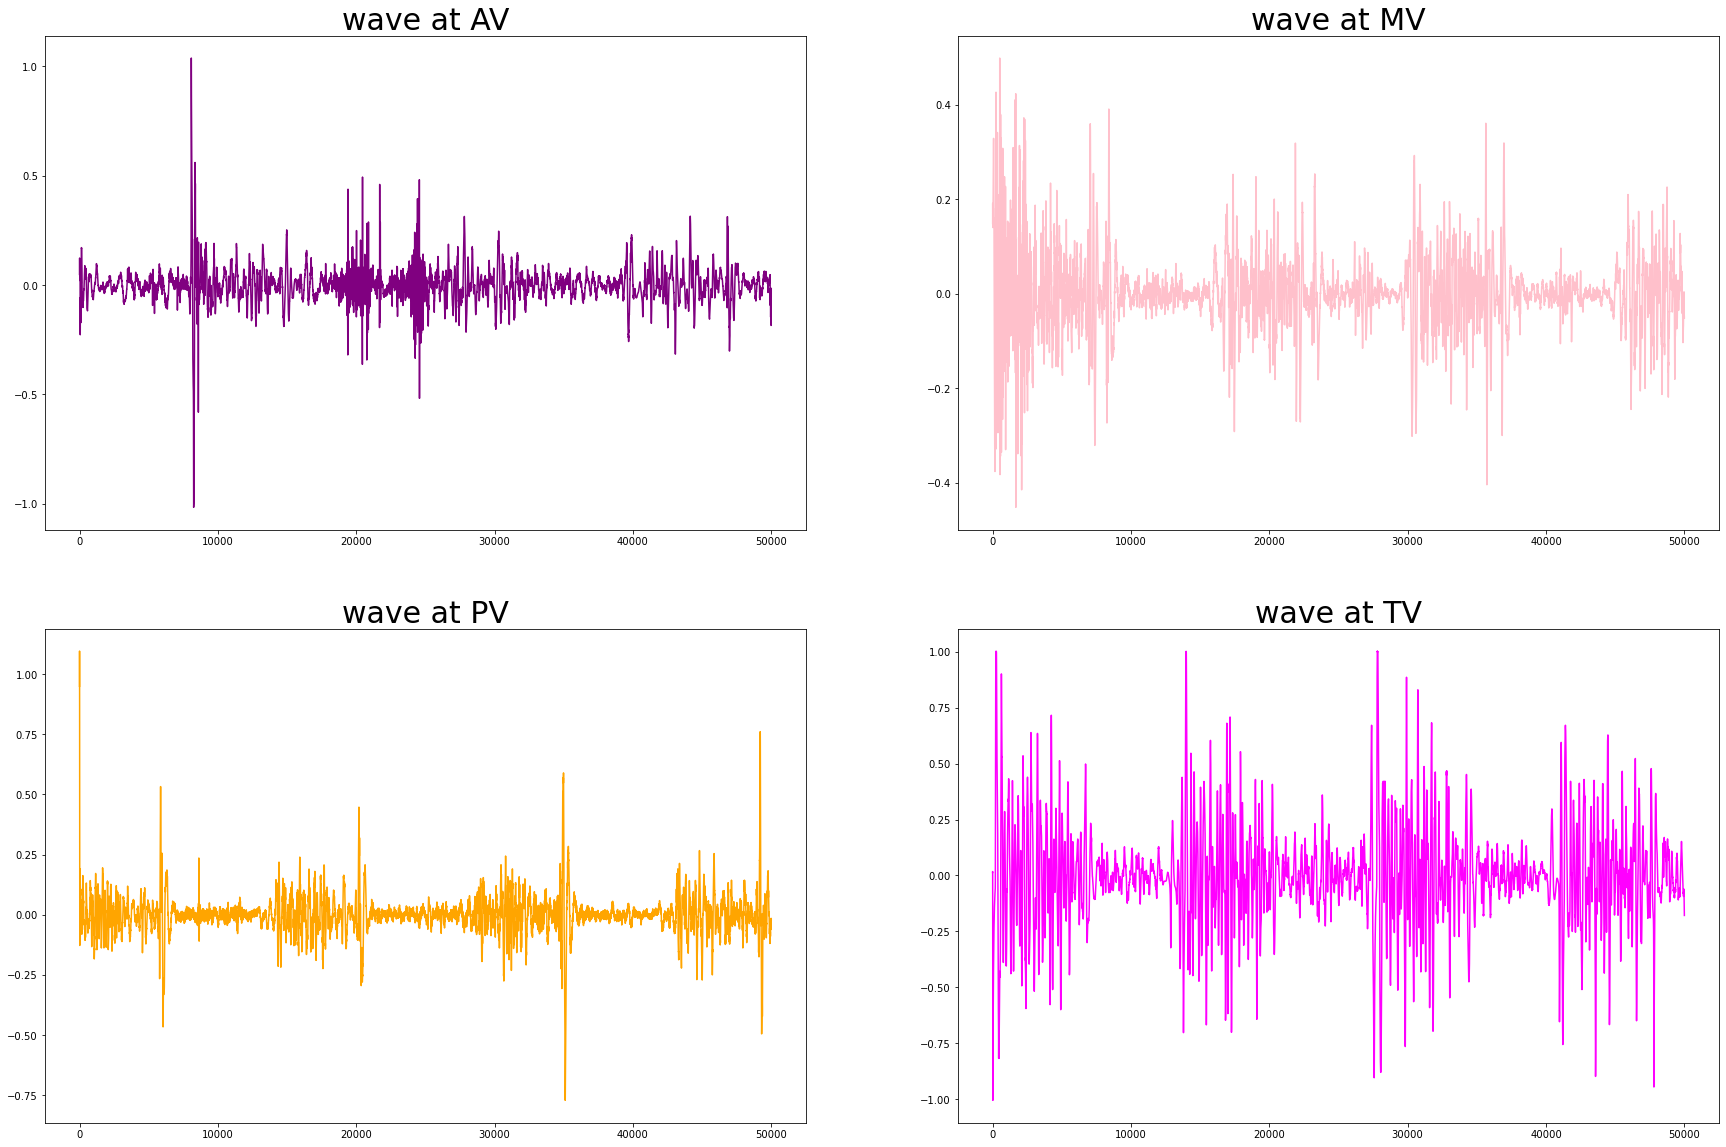

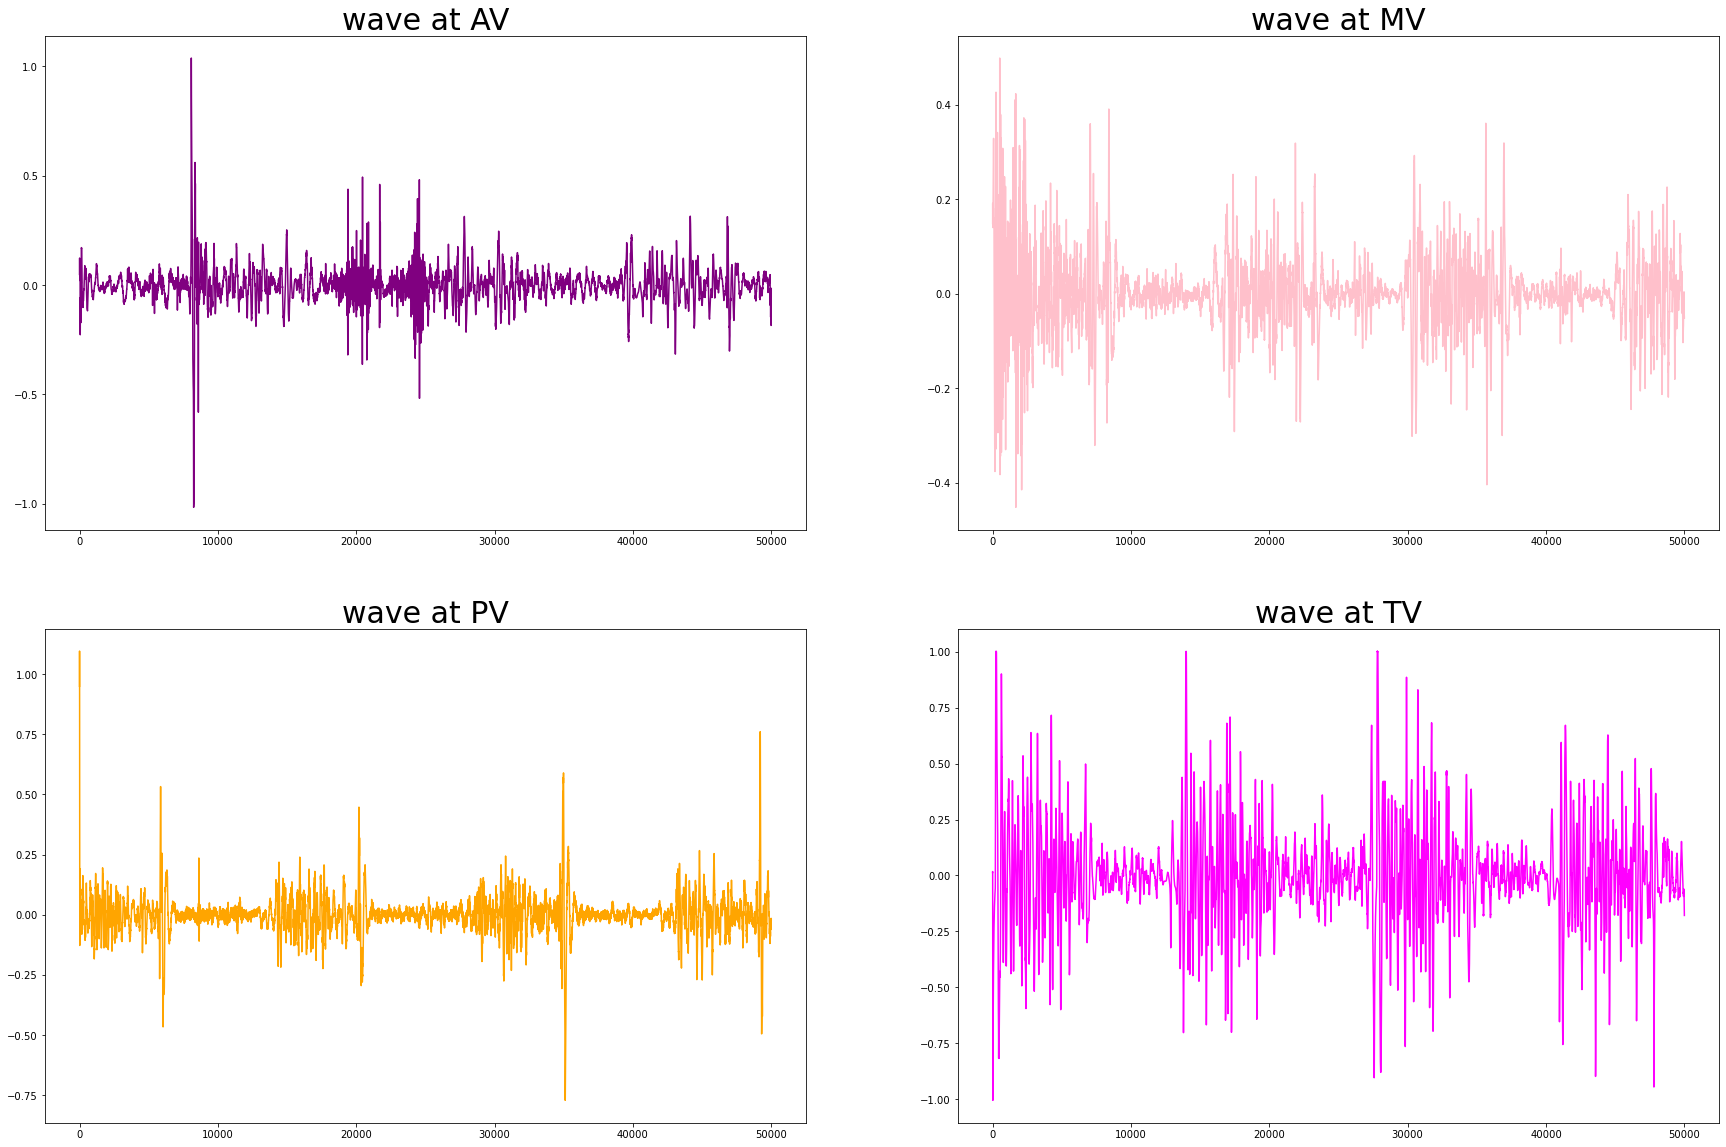

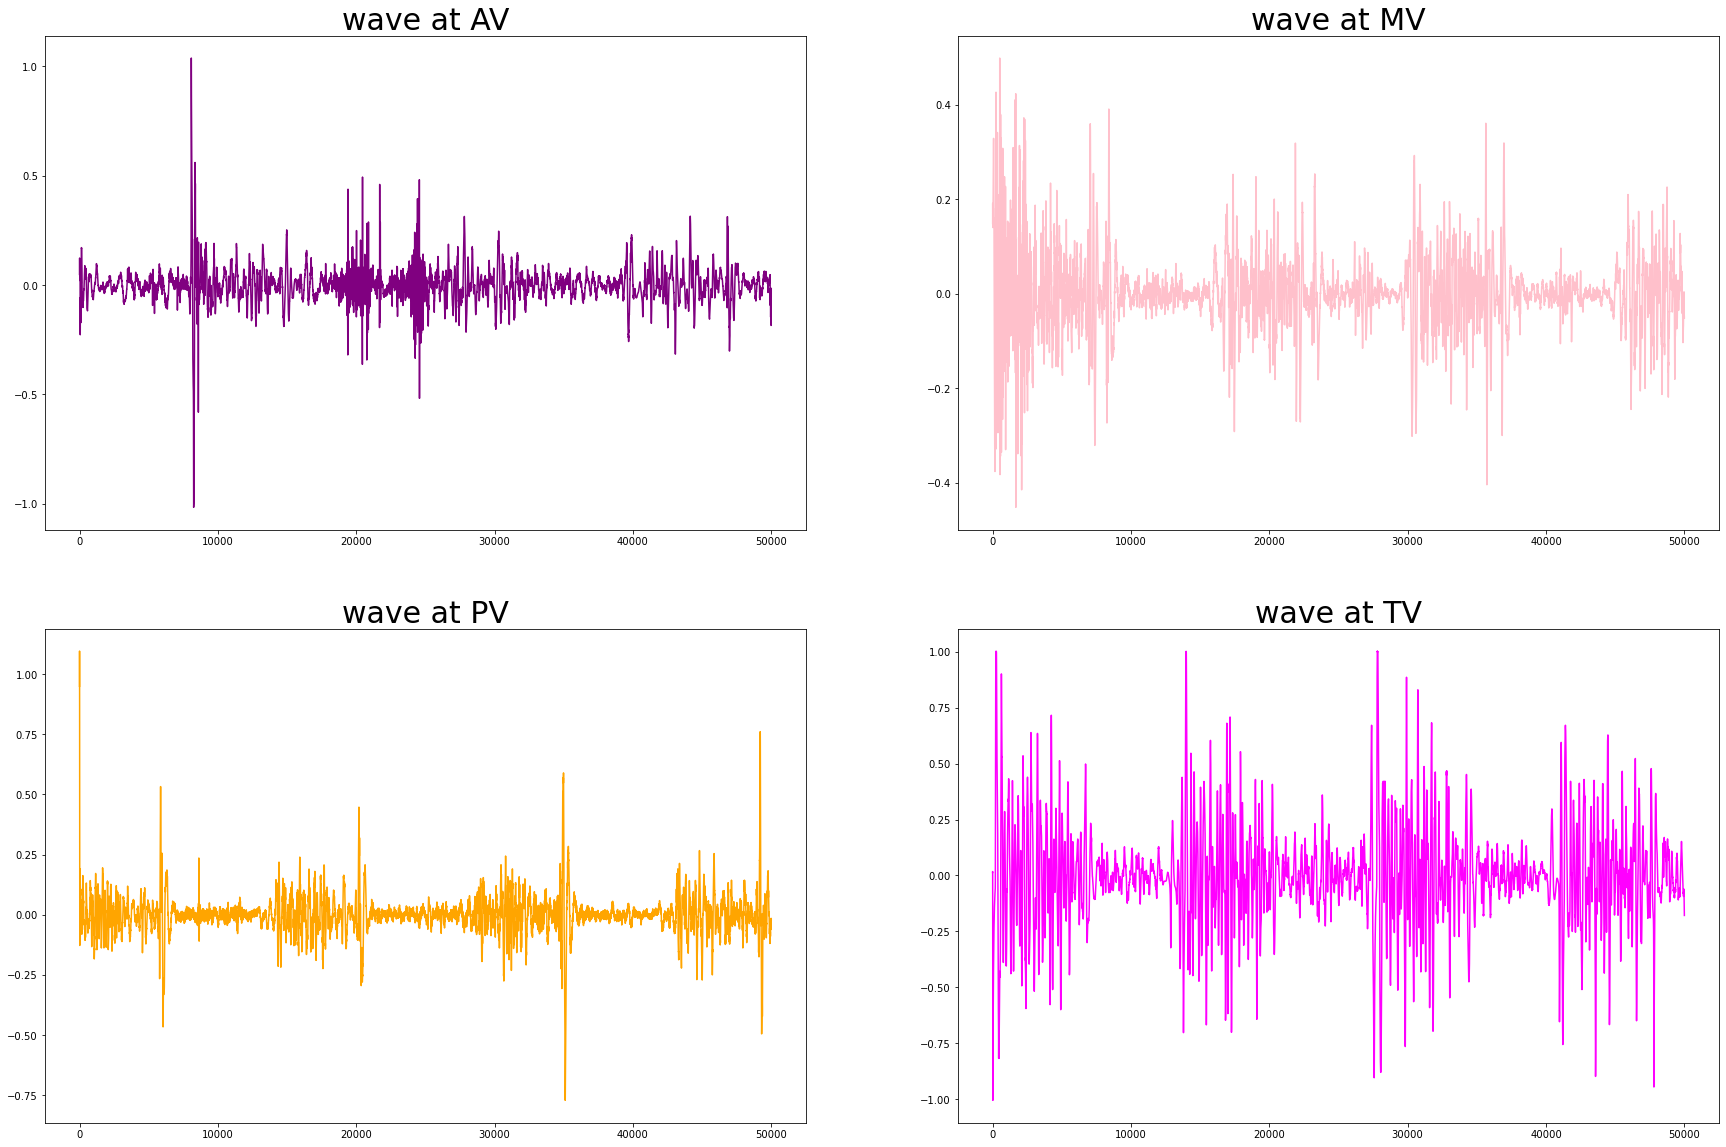

In [17]:
for i in pmat:
    wave = []
    for file in os.listdir(dir_path):
        if (file.endswith(".wav")) and (int(file.split("_")[0]) == i ) :
            wave.append(librosa.load(os.path.join(dir_path, file))[0]) 
            
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 20))

            ax1.plot(waves_9[2][:50000], color = 'purple')
            ax1.set_title("wave at AV", fontsize = 30)

            ax2.plot(waves_9[1][:50000], color = 'pink')
            ax2.set_title("wave at MV", fontsize = 30)

            ax3.plot(waves_9[0][:50000], color = 'orange')
            ax3.set_title("wave at PV", fontsize = 30)

            ax4.plot(waves_9[3][:50000], color = 'magenta')
            ax4.set_title("wave at TV", fontsize = 30)


plt.show()